# Evolutionary Computation (CS5048)

Edgar Covantes Osuna, PhD

Email: edgar.covantes@tex.mx

Student name: **Miguel Lara**

ID: 

$
\def\onemax{{\rm O{\Tiny NE}M{\Tiny AX}}}
\def\zeromax{{\rm Z{\Tiny ERO}M{\Tiny AX}}}
\def\twomax{{\rm T{\Tiny WO}M{\Tiny AX}}}
\def\Mtwo{{\rm M_2}}
$

## Multimodal Optimisation

From the Lecture "Multimodal and Multi-objective Optimisation" you learned the theoretical fundations of Multimodal Optimisation as a small set of optimisation and black box optimisation problems.

You know are familiar with the terms objective function, search point, search space, function values, global and local optimums. You also know that in the context of Evolutionary Computation
- the objective function is called fitness function,
- the search point is called individual or solution,
- the search space is still called search space,
- the function values are called fitness function values.
- a multi-set of search points is called population,
- and the fitness landscape refers to the "shape" of the search space based on natural landscapes.

You are now familiar with the deference between unimodal and multimodal functions and the problem that all algorithms have to overcome when solving multimodal problems: premature convergence.

And finally you also are familiar with different methods that you can use to solve (or at least delay) premature convergence, methods to promote diversity into the population, in particular, sharing and crowding mechanisms.

## Instructions

In this activity you will tackle 4 multimodal problems (all of them are defined as maximisation problems) with different degrees of multimodality using evolutionary computation. 

You can use any evolutionary strategy you want but you can's use any framework available in the internet. This is, you will need to design and program your solution from scratch using just Python and on Google Colab.

It is expected from you to read the literature so you can solve these problems. By knowing the problem it will be easier for you to make decisions about parameter settings, mechanisms to apply, the search space to use and the structure of the inviduals to use.

**The goal**:

At the end of the execution of your evolutionary strategy you should present a population containing ALL global and local optimum. Your algorithm should be able to find and maintain ALL optima in the search space.

**Marking scheme**:
- $\twomax$ function has 2 global optimum (13 points).
- $\Mtwo$ function has 1 global optimum and 4 local optimum (33 points).
- Six-hump Camel back function has 2 global optimum and 2 local optimum (27 points).
- Himmelblau function has 4 global optimum (27 points).

**Suggestions**
- Read carefully each section and spend time understanding each function. Each function may require specific representations or operator. I highly suggest reading the slides and the papers referenced there before solving the functions.

## Imports

You can add all the necessary packages in the following cell.

In [1]:
# IF YOU WANT YOU CAN USE THIS CELL TO ADD YOUR IMPORTS.
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

#Uncomment the next line incase the latex fonts are not installed in your system.
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

## $\twomax$

This function may be the most theoretically analised function. This is a popular and challenging test problem since both optima have the maximum Hamming distance between them and it is necessary to keep diversity for a long time. Here is the formal definition of the function.

**Definition ($\twomax$)**: A bimodal function which consists of two different symmetric slopes $\zeromax$ and $\onemax$ with $0^n$ and $1^n$ as global optima, respectively.
$$\twomax(x):=\max\left\{\sum_{i=1}^{n}x_i,n-\sum_{i=1}^{n}x_i\right\}.$$
In the region of search points with more than $n/2$ 1-bits, the fitness increases with the number of 1-bits and in the region of search points with less than $n/2$ 1-bits, the fitness increases with the number of 0-bits. These sets are refereed as branches. The aim is to find a population containing both optima.

A sketch of $\twomax$ with a size problem of $n=100$ can be obtained by running the following cell.

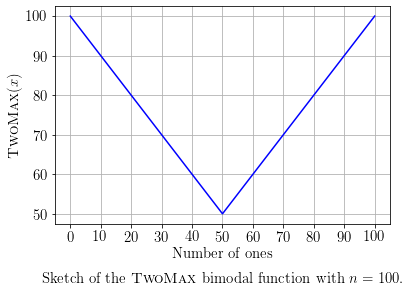

In [2]:
def twomax_plot(x, dimension):
  return (np.abs((dimension/2) - x) + (dimension/2))

dimension = 100
x = np.arange(0, dimension+1, 1)

plt.figure()
plt.title(r'Sketch of the $\textsc{TwoMax}$ bimodal function with $n=100$.',size=15, y=-0.3)
plt.xlabel(r'Number of ones', size=15)
plt.ylabel(r'$\textsc{TwoMax}(x)$', size=15)
plt.xticks(np.arange(0, dimension+1, 10), size=15)
plt.yticks(np.arange(0, dimension+1, 10), size=15) 
plt.plot(x, twomax_plot(x, dimension), 'b')
plt.grid()
plt.show()

### Function Definition
Here is the definition of the $\twomax$ function.

In [3]:
def twomax(x):
  dimension = len(x)
  one_bits = [ones for ones in x[:] if ones==1]
  return (np.abs(dimension/2 - len(one_bits)) + (dimension/2))

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 10 * population_size * n * np.log(n)
```
Use these parameters to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find both optima on $\twomax$, I have mathematically prove that, so is enough. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all optima before all the time budget is used go ahead and stop the run.


In [30]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 50
offspring_size = 0 #not used
mutation_prob = 0.01
crossover_prob = 0.9
problem_size =  100 # this will be your problem size or the size of your individuals
S = 2 # Size of family to participate in tournaments

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = int(np.round(10 * population_size * problem_size * np.log(problem_size))) # you can use this one as fitness function evaluations if you want

### Evolutionary Strategy for $\twomax$

**The following code implements a solution using Determinisitic Crowding proposed by Mengshoel and Goldberg [2]. The algorithm is divided in 6 phases:**
  1.  An array with the index of each individual of the population is created. 
  2.  Two parents are randomly selected without replacement for variation purposes.
  3. One-point crossover and bitwise mutation. Both using a probability of crossover and mutation as pc and pc respectively.
  4. The distance between parents and children are computed. This creates a 2x2 array. 
  5. Then the match function is used. This function ensures to select the pair of parent/child to be used. The one with the less difference (less distance) is selected.
  6. Finally, the resulting match, wich contains two tuples, is used for local tournament. This is where the child are used or overrided with parents gene. For this the fitness fucntion is used, the individual chosen is the one with the higher fitness value.

Note: the replacement rule selected for this implementation was the simplest where the children is selected if has higher fitness value, if the fitness value is the same then a random selection is applied, otherwise the individual selected to fill the new population is the parent.

#### Initialisation

**The following two functions are used to create the population. It was decided to used a binary representation which is created by "create Individual" and the function "new" is used to create the population, which in this case calls the first function to create individual of specified length.**

In [5]:
# Implements the random initialization of individuals using the binary representation.
def createIndividual(nbBits):
    return np.random.randint(2, size = nbBits)

# Creates the initial population
def new(n, populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): # to add the potential solutions******
      individual = createIndividual(n)    
      population[i] = individual 
      
  return population

#### Stopping Criterion
**The code below is used as stop criterion. This function identifies when at least there are two individuals with the solutions in the population, which is one individual filled with ones and other individual filled with zeros.**

In [6]:
def stop_crit(population, n, function):
  max1 = False
  max2 = False

  for individual in population:
    evaluation = function(individual)
    if (1 in individual) and (evaluation == n): 
      max1 = True
    elif (0 in individual) and (evaluation == n): 
      max2 = True 
    
    if (max1 and max2):
      return True

  return False

#### Selection for Reproduction

**This implementation does not require selection for reproduction. The selection is randomized by using all the individuals in the population. This is specified in the phase 2 of the algorithm**

#### Variation

**The following code was taken from an activity provided by Dr.Bayliss. The first fucntion applies bitwise mutation and the second function applies the one-point crossover. Both functions require a probability to be used, if the probability is not met then they return the same individuals.**

In [7]:
# Dr.Jose Carlos's code
import random 

# Implements the flip mutation on individuals using the binary representation.
def mutate(individual, mRate):
    """
    Note that the randint has a range, it can be changed depending on the problem
    """
    for i in range(len(individual)):
        if (random.random() <= mRate):
          if individual[i] == 1:
            individual[i] = 0
          else:
            individual[i] = 1
    return individual

# Implements the one point crossover on individuals using the binary representation.
def combine(parentA, parentB, cRate):
    """
    cRate  = value to allow combination the higher the higher allowance
    Note that cPoint is randomly selected, there is no preference for the first part of the code
    """
    if (random.random() <= cRate):
        cPoint = np.random.randint(1, len(parentA))
        #print(cPoint)   
        offspringA = np.append(parentA[0:cPoint], parentB[cPoint:])
        offspringB = np.append(parentB[0:cPoint], parentA[cPoint:])
    else:
        offspringA = np.copy(parentA)
        offspringB = np.copy(parentB)

    return offspringA, offspringB

#### Selection for Survival

**In this set of cells the functions core of the Deterministic crowding are shown. The first two functions "distance" and "ham_distance" applies the hamming distance. The third fucntion "match" does the selection of the tuple of individuals that are closer to each other. The fourth function implements the rules of replacement, which as mentioned before it decides whether the best individual is the child or parent based on their fitness value.**

In [8]:
def distance(x1, y1):
  """
  Returns how far one individual is from the other
  """
  return abs(sum(x1)-sum(y1))

def ham_dis(x1, y1):
  """
  Returns the hamming distance
  """
  count = 0
  for i in range (len(x1)):
    if x1[i] != y1[i]:
      count += 1 
  return count

def match(distance,parent,child,S):
  #only for 2 so for now
  i = 0
  d1 = distance[i,i] + distance[i+1,i+1]
  d2 = distance[i,i+1] + distance[i+1,i]
  #print(d1, d2, "d1 y d2")  

  if d1 < d2:
    less_d =  [(parent[i],child[i]),(parent[i+1], child[i+1])]
  else:
    less_d =  [(parent[i],child[i+1]),(parent[i+1], child[i])]
  
  return less_d
  
def R(parent, child):
  if child > parent:
    winner = True
  elif child == parent:
    if random.random() <= 0.5:
      winner = True
    else:
      winner = False
  else:
    winner = False
  return winner

**The last function "crowding step" puts together all the functions previously defined. This fucntion is the one that runs the deterministic crowdind. This is where all the 6 phases work together in order to provide the best solutions.**

In [9]:
def crowdingStep(old_pop, S, mRate, cRate, gc, R, function):
  indexPool = [None] * len(old_pop)
  parent = [None] * S
  child = [None] * S
  distance = np.zeros(shape=(S,S))
  newPopulation = [None] * len(old_pop)
  k = 0 #Phase 0 ->  create running index for newPopulation
  for i in range (len(old_pop)):
    indexPool[i] = i
  while len(indexPool) > 1 :
    for i in range(S): #Phase 1 -> select parents form old_pop
      random = np.random.randint(0, len(indexPool)) #uniformly at random
      #print(random,"random")
      j = indexPool[random]
      parent[i] = old_pop[j]
      indexPool.pop(random) # remove index of random individual
    #print(parent,"parent")
    for i in range(0,S-1,2): # Phase 2 -> Perform Crossover and Mutation
      offspring1, offspring2 = combine(parent[i], parent[i+1], cRate)
      #print(offspring1,offspring2, "offsprings")
      child[i] = mutate(offspring1, mRate)
      child[i+1] = mutate(offspring2, mRate)
      #print(child[i],child[i+1], "Childs")
    for i in range(S): #Phase 3 -> Select ith parent
      for j in range(S): #Select jth child
        distance[i,j] = ham_dis(parent[i], child[j])
    #print(distance, "matriz distancias")
    mstar = match(distance,parent,child,S) #Phase 4 -> Compute matchings
    #print(mstar,"mstar")
    for i in range(S): #Phase 5 -> Invoke Rule for each mi of mstar
      c = mstar[i][1] #Get index of child in match mi
      p = mstar[i][0] #Get index of parent in match mi
      #print(p,c,"parent and child")
      if R(function(p), function(c)): #Tournament using replacement rule R
        w = c #Child is winner in local tournament
      else:
        w = p #Parent is winner in local tournament
      #print(w)
      newPopulation[k] = w
      k += 1

  return newPopulation

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should looks something like this
```
# <Generation/Fitness Evaluation number> <Fitness> <Genotype>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.


The following code call the crowding function to use it within a loop to be run for the specified generations. If the algorithm finds the solution before the number of generations is completed then it stops.

Note: The parameters for the problem are defined in the first cell of this code implementation.
**Note2: The code for the problem size = 100, takes between 1min to 1min 20sec (200 to 400 generations).**

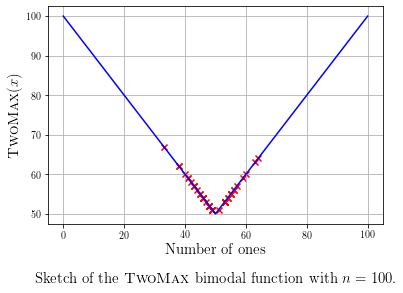

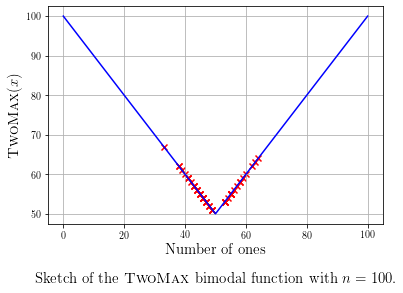

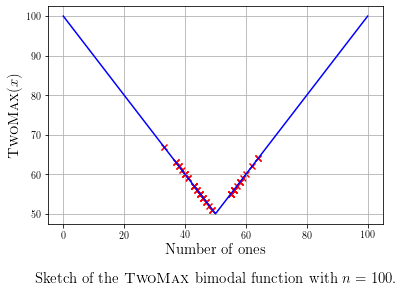

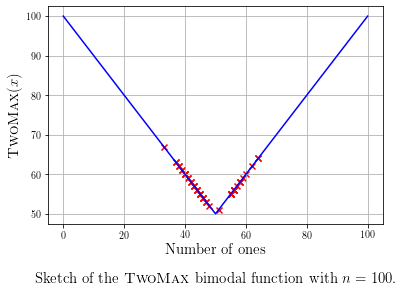

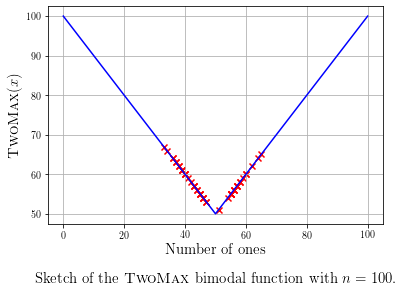

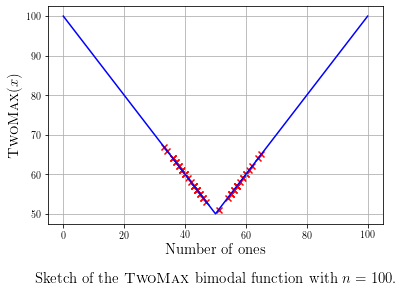

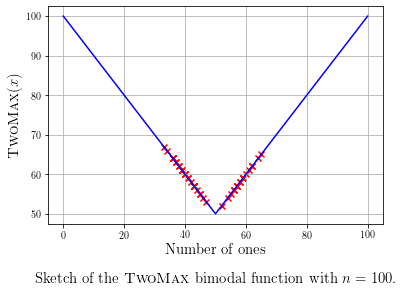

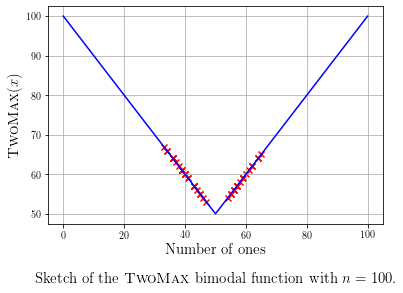

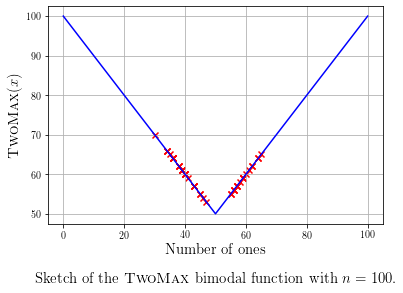

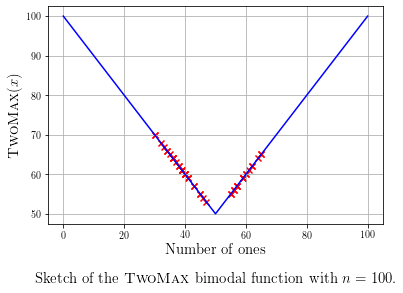

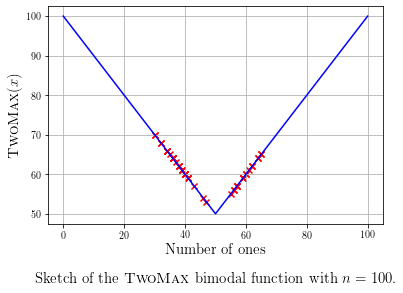

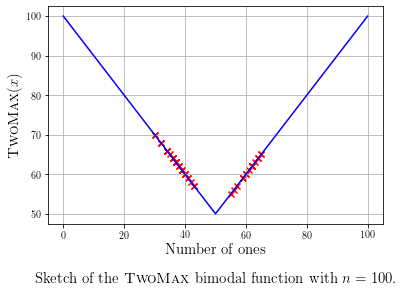

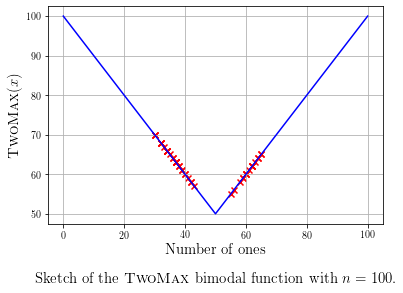

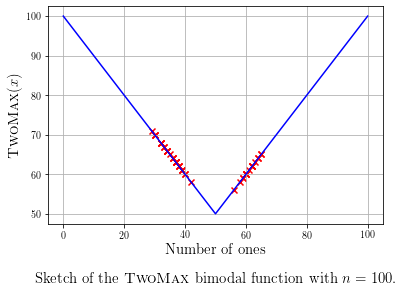

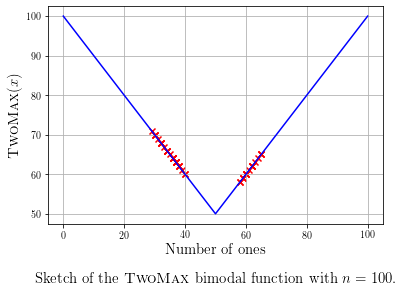

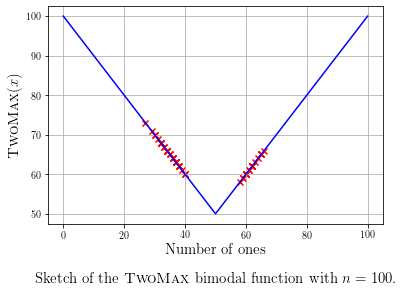

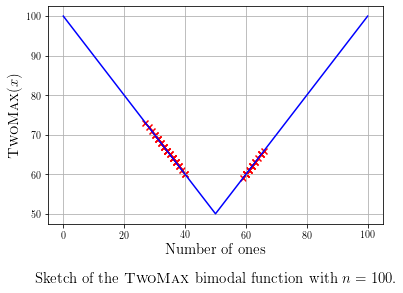

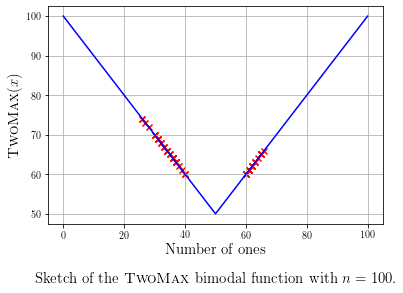

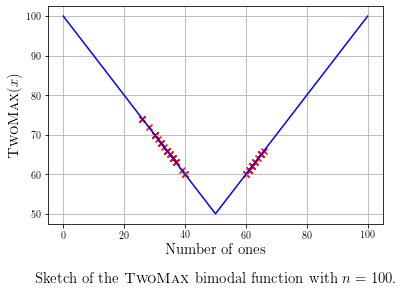

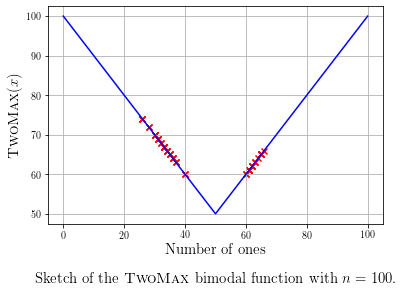

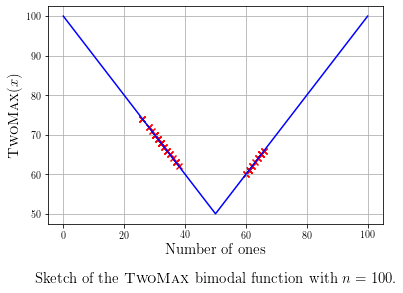

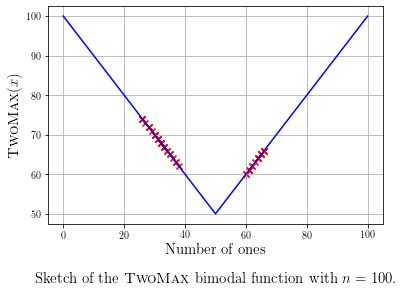

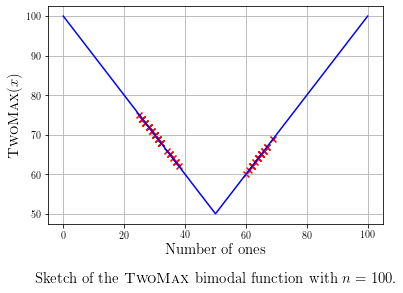

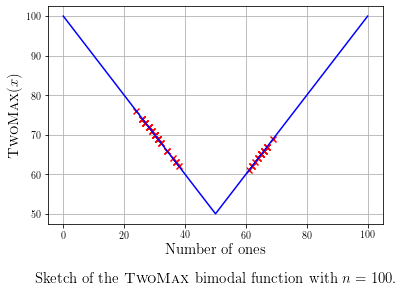

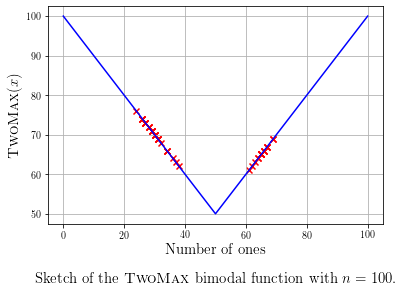

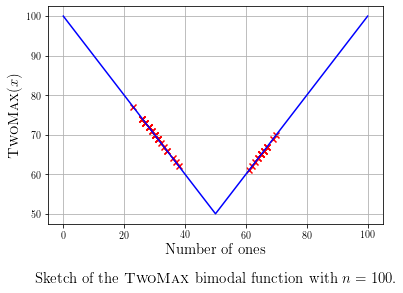

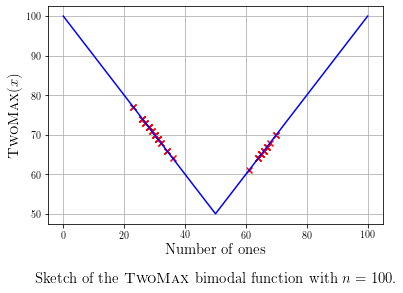

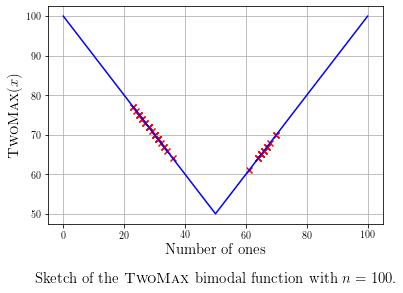

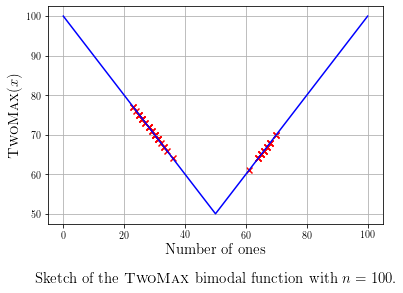

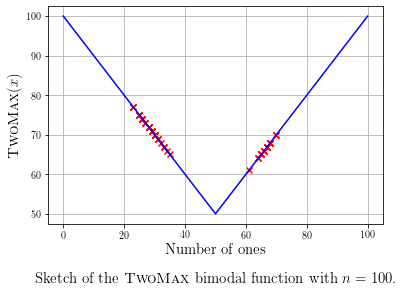

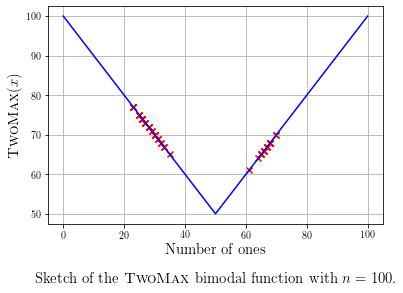

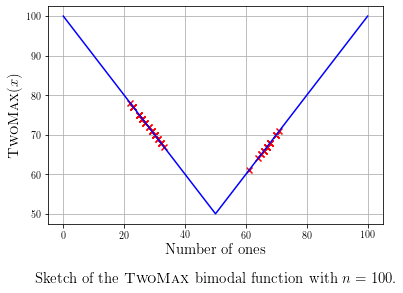

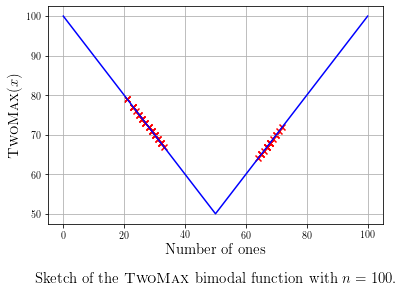

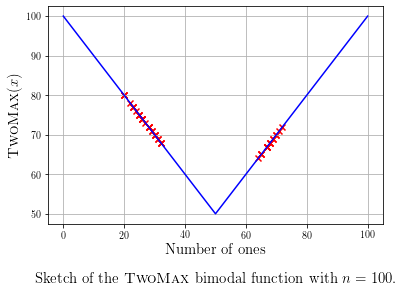

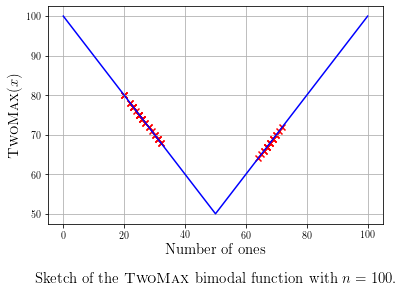

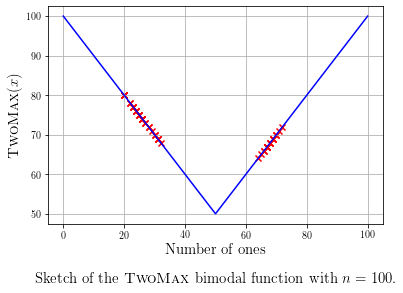

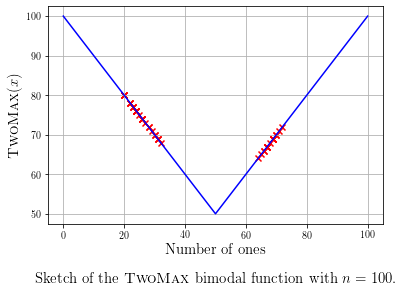

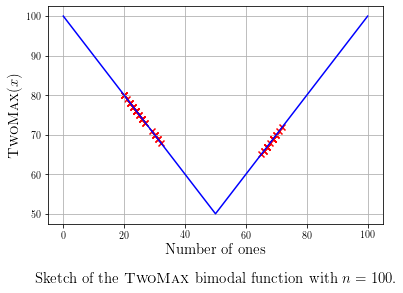

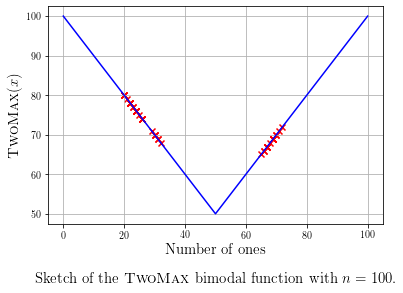

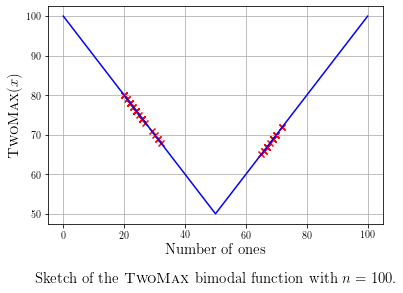

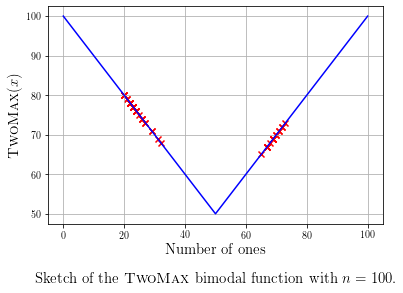

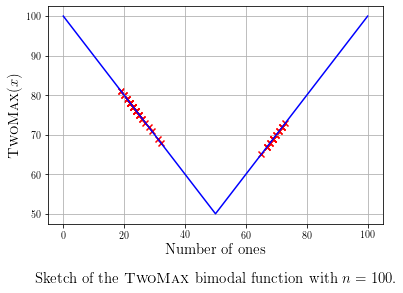

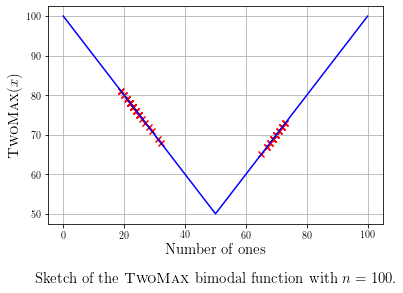

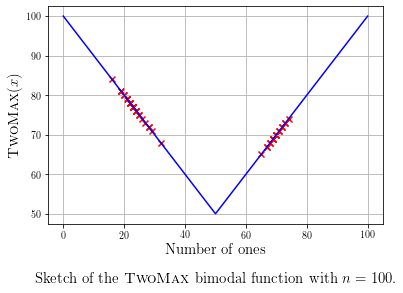

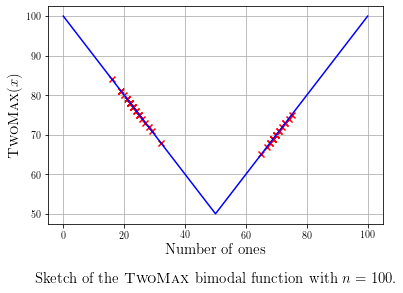

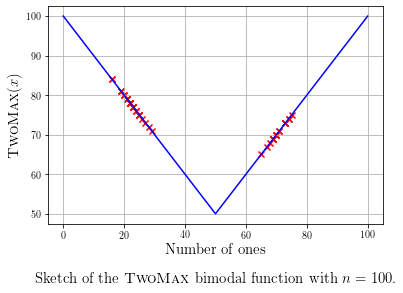

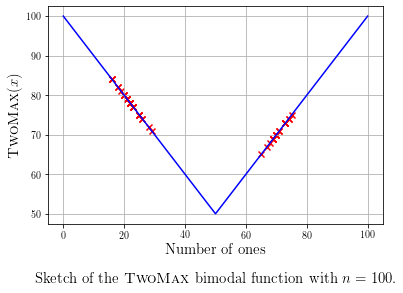

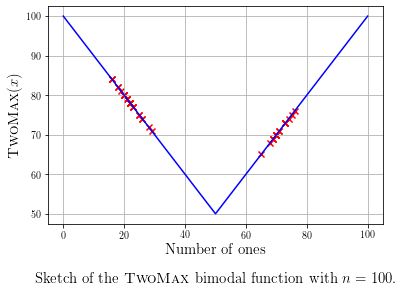

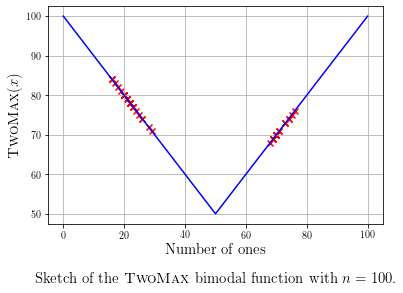

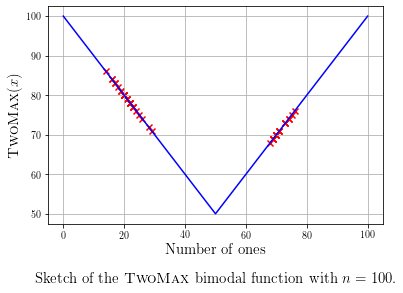

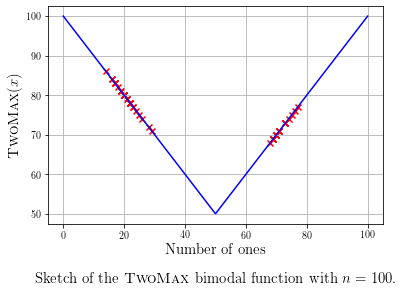

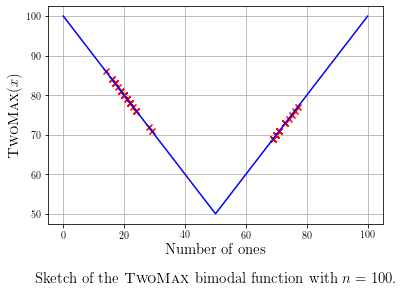

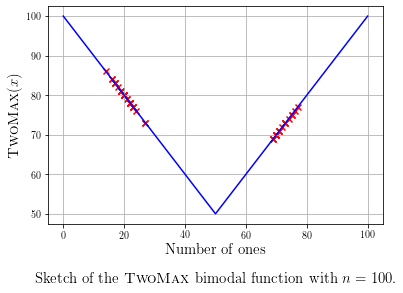

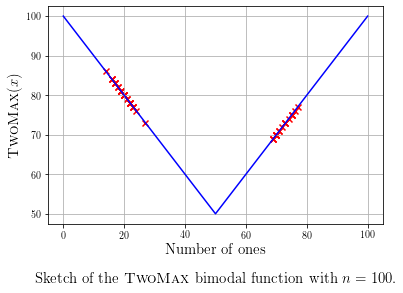

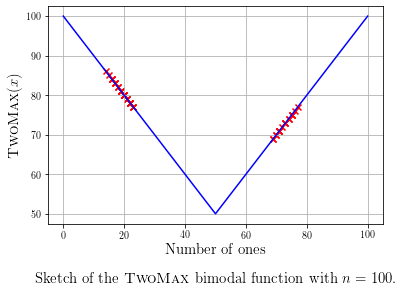

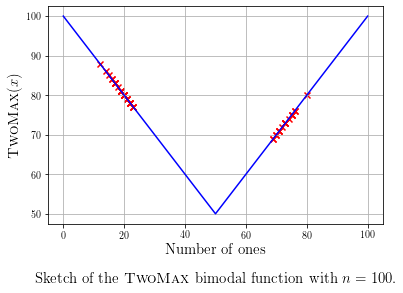

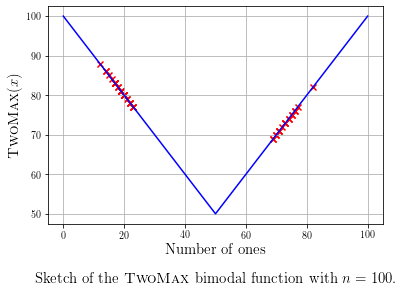

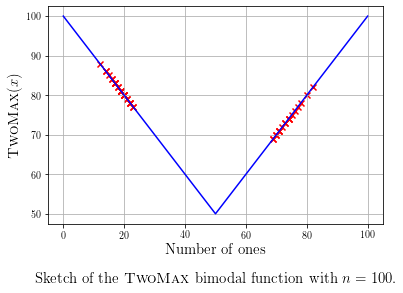

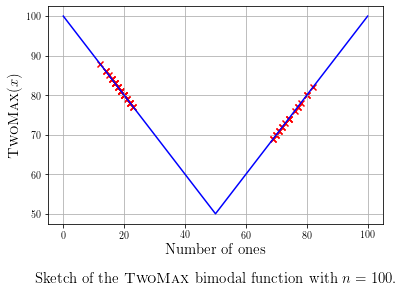

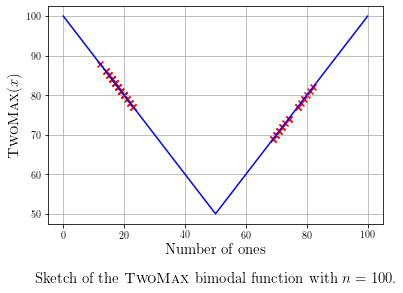

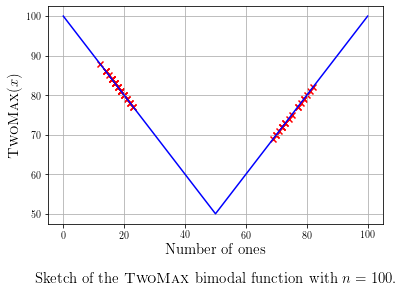

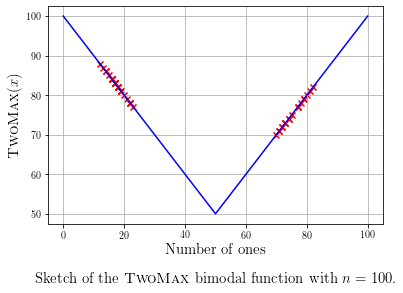

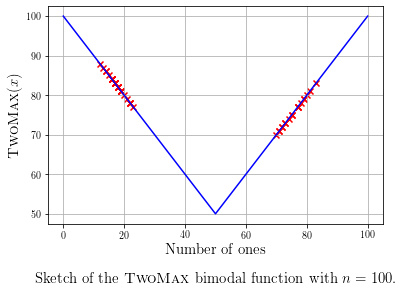

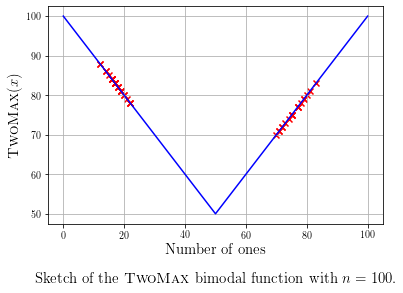

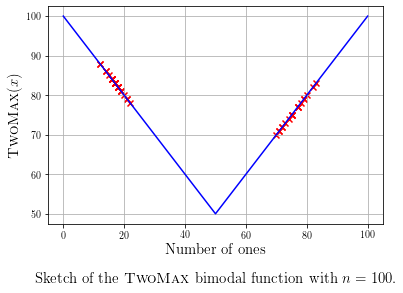

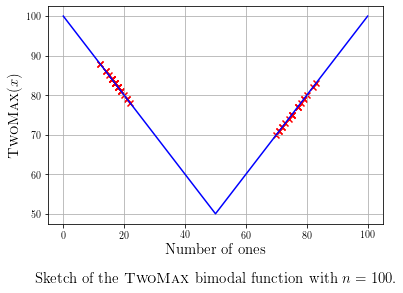

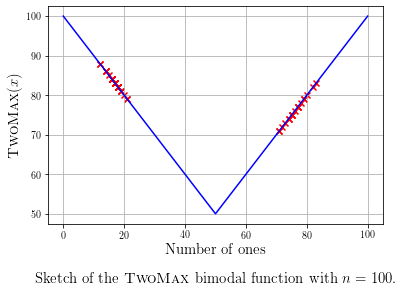

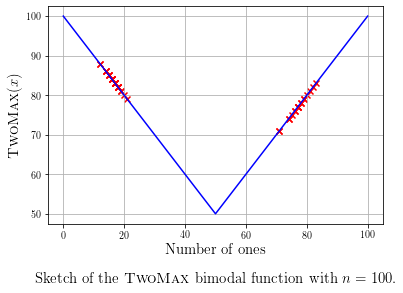

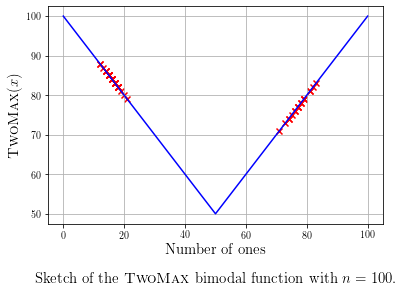

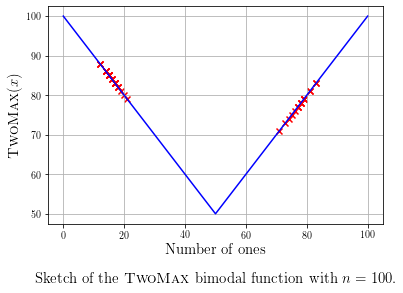

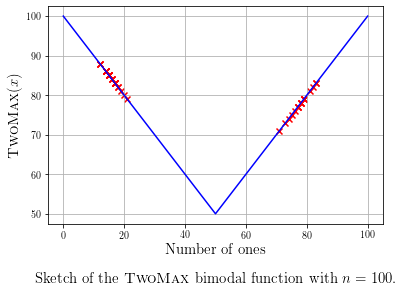

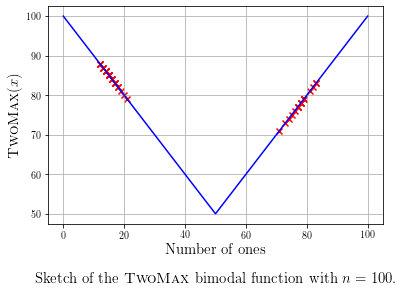

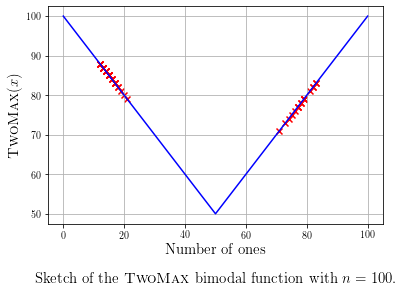

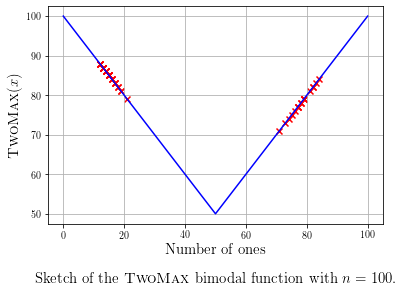

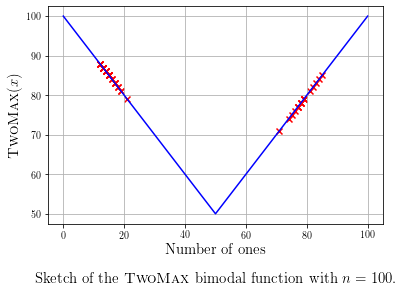

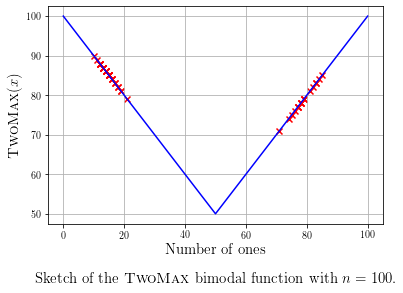

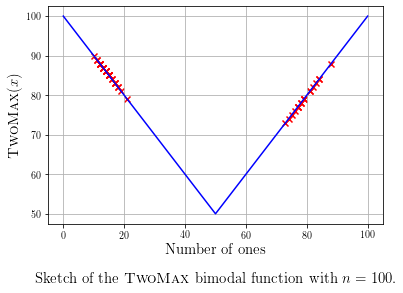

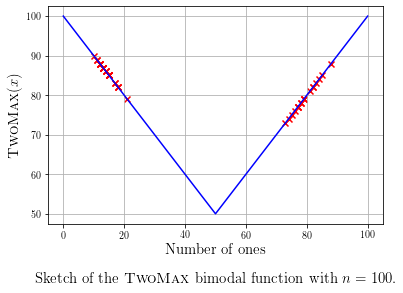

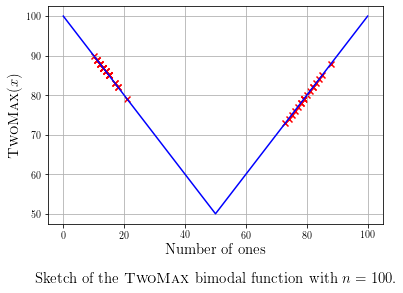

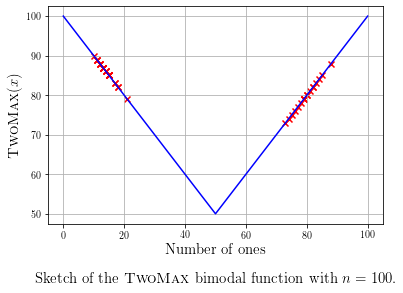

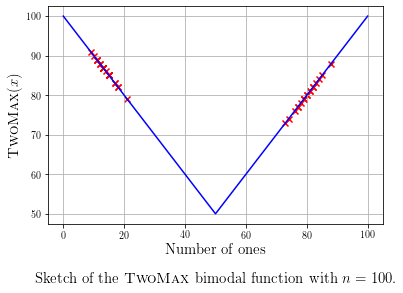

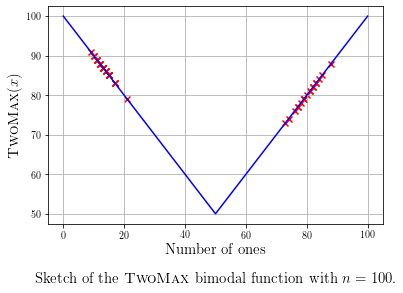

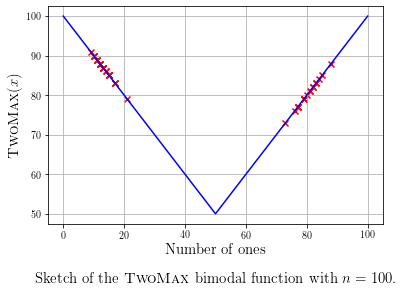

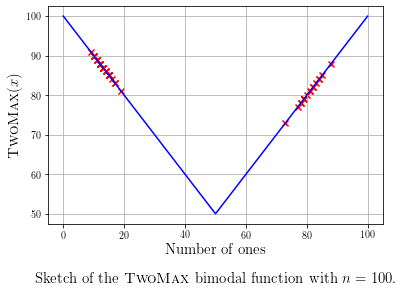

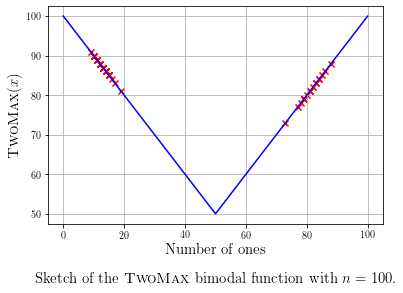

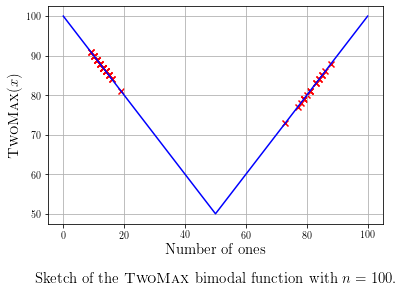

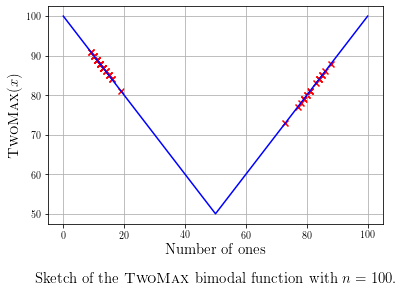

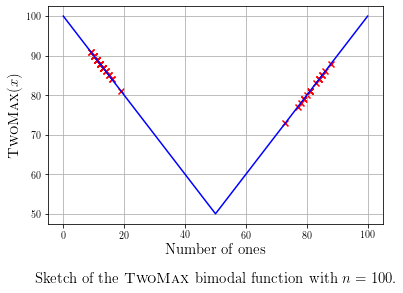

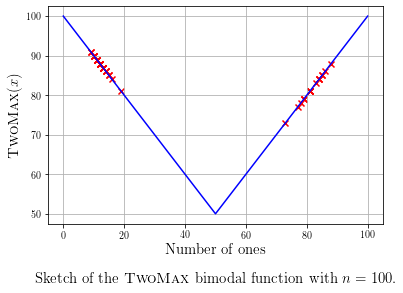

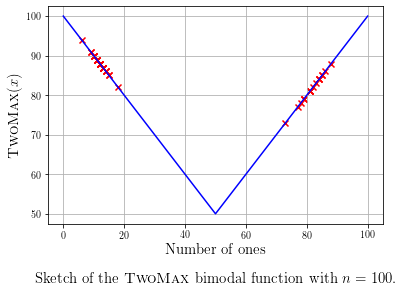

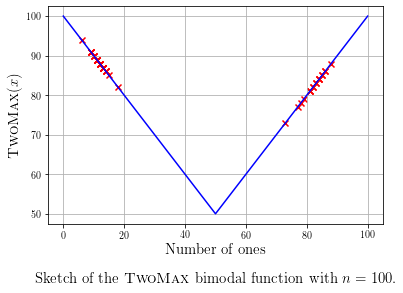

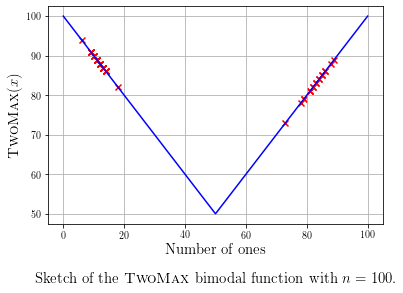

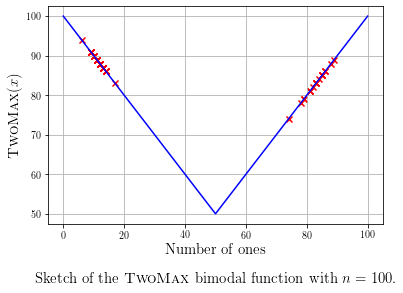

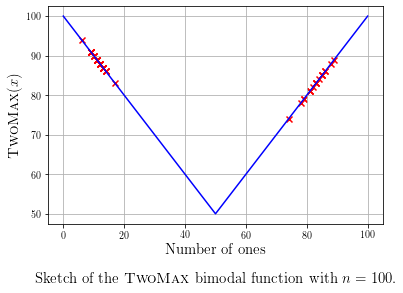

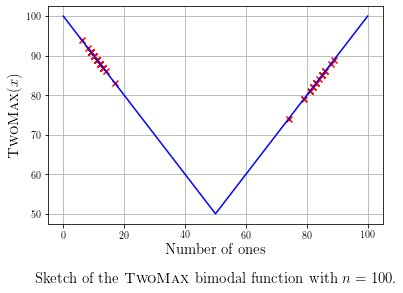

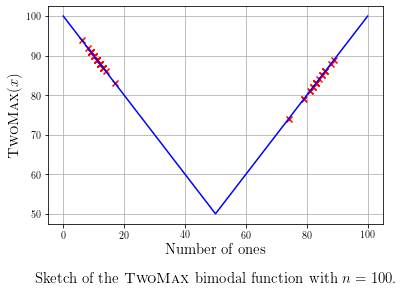

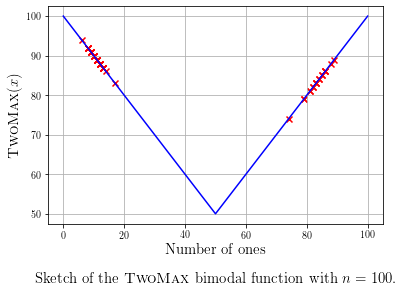

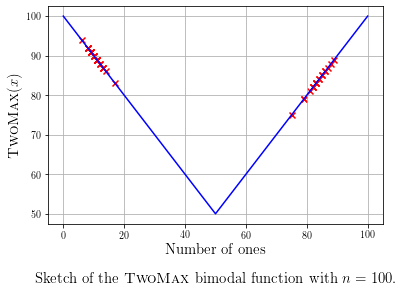

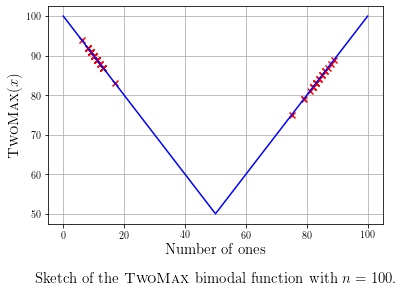

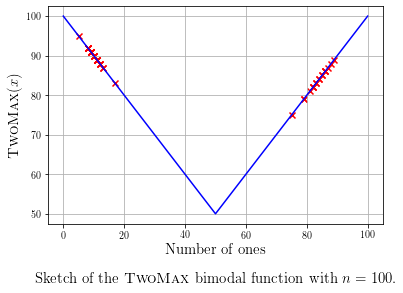

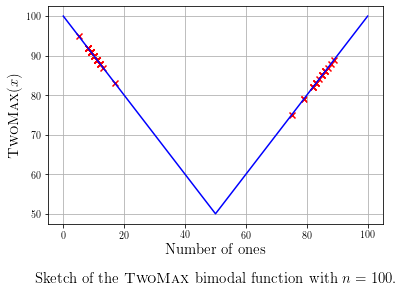

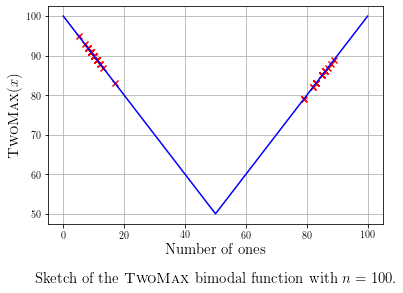

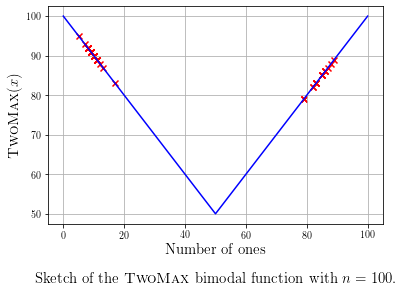

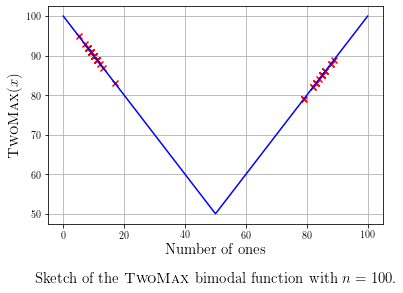

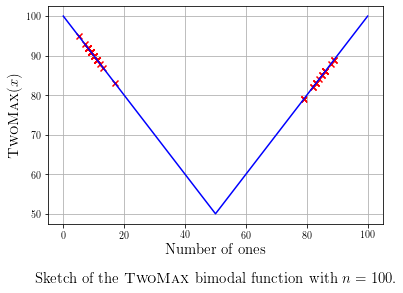

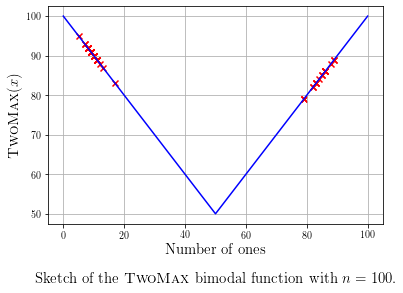

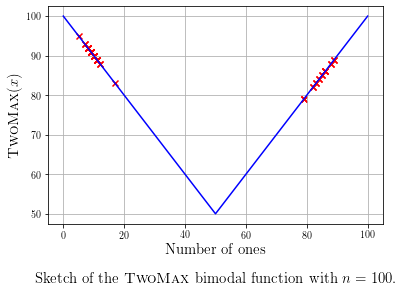

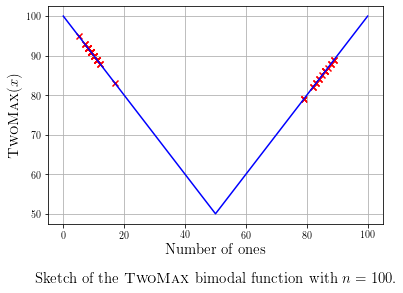

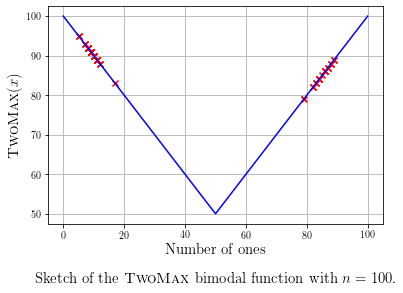

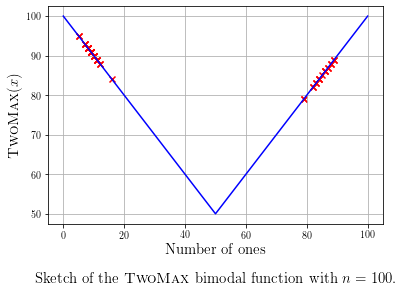

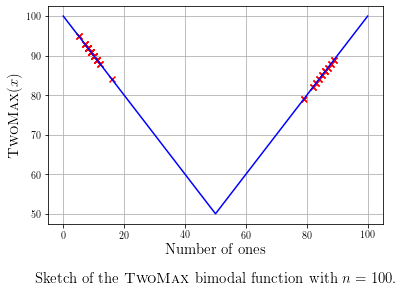

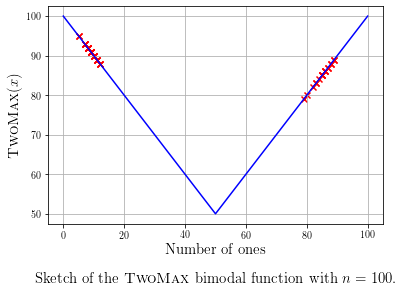

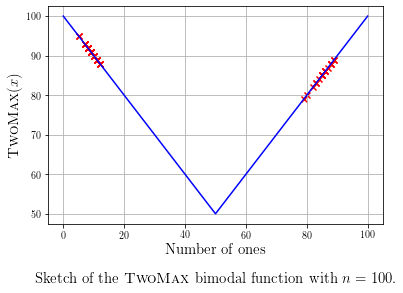

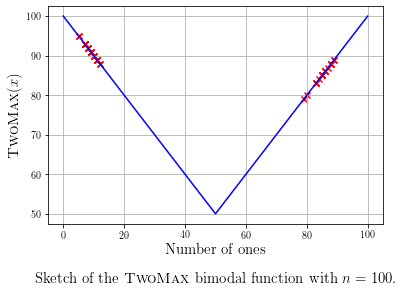

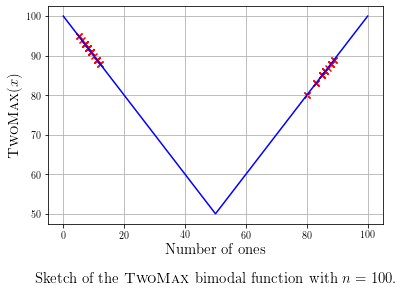

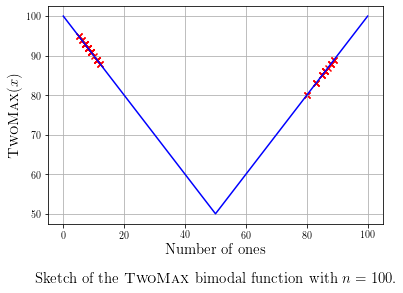

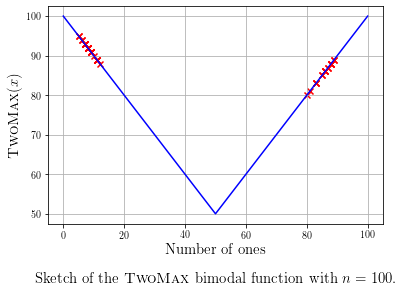

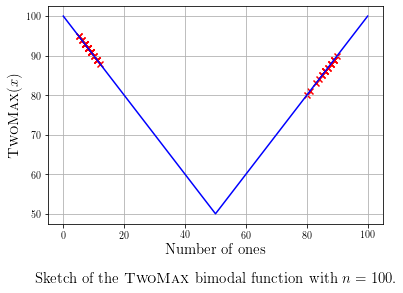

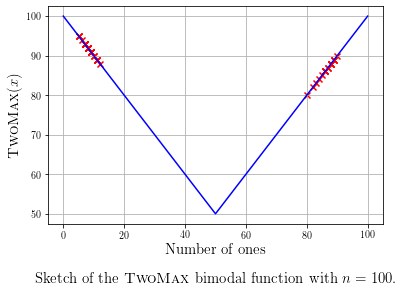

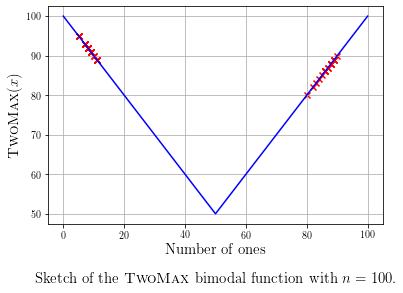

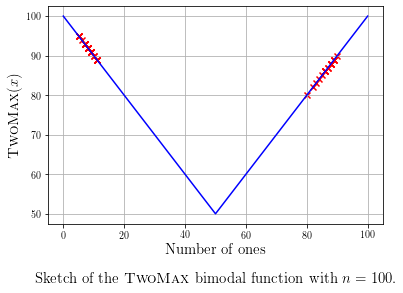

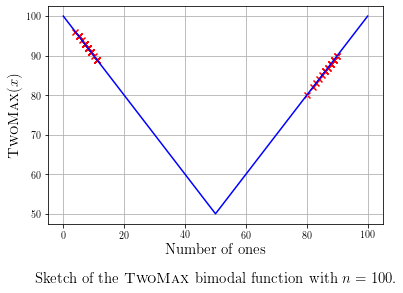

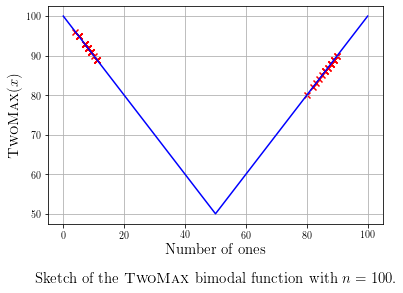

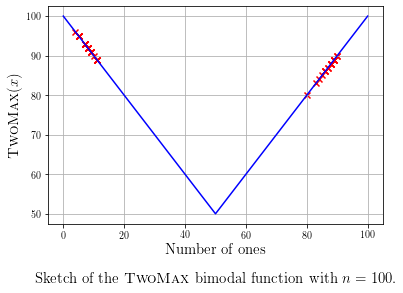

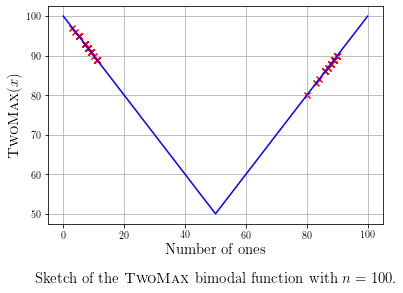

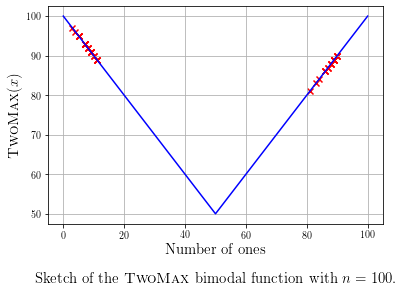

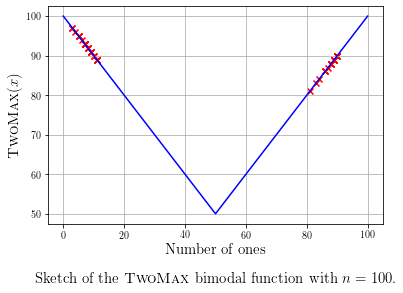

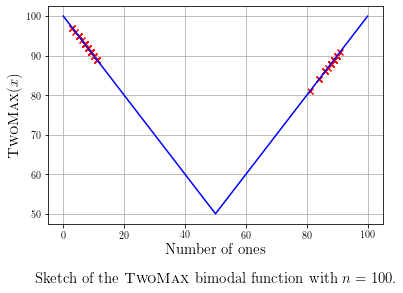

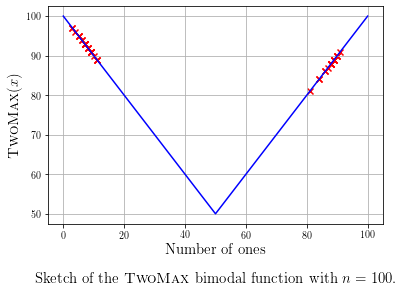

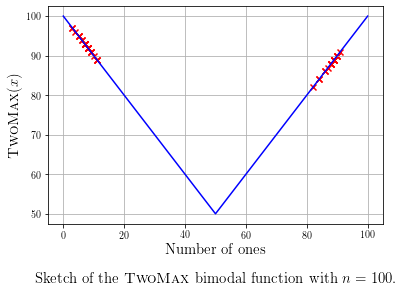

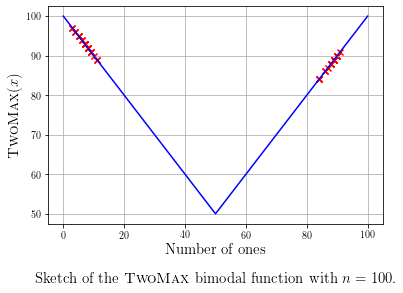

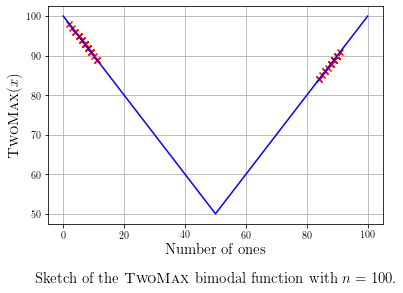

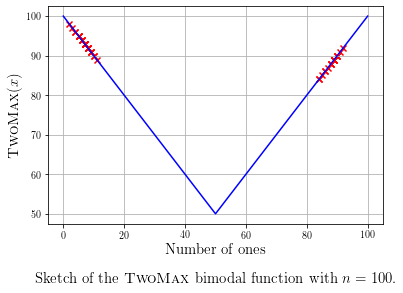

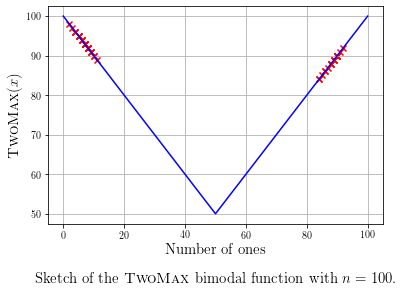

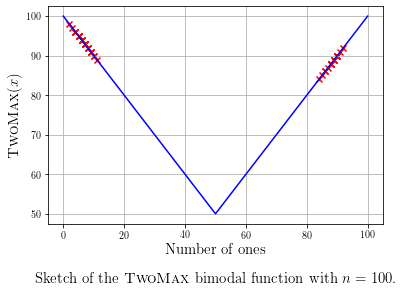

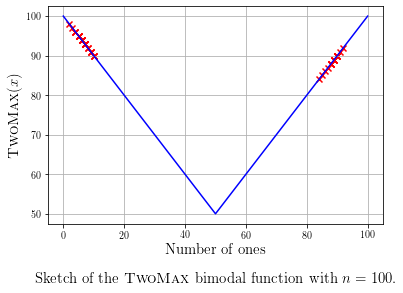

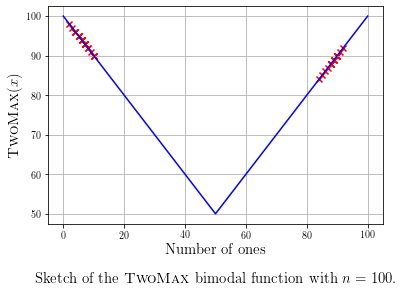

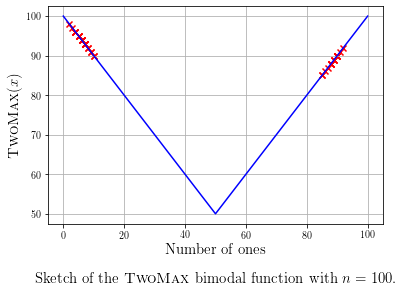

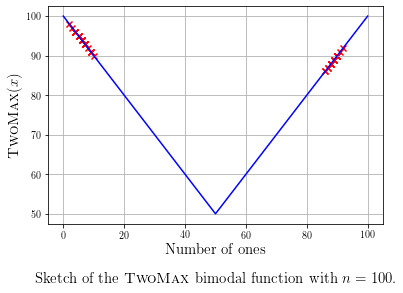

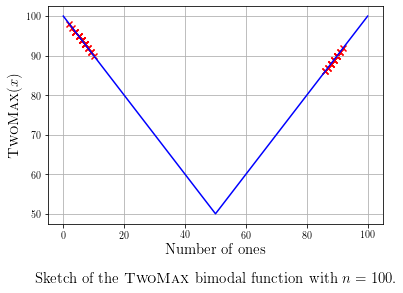

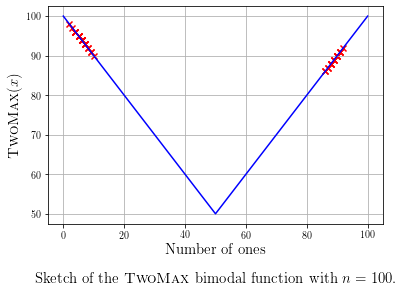

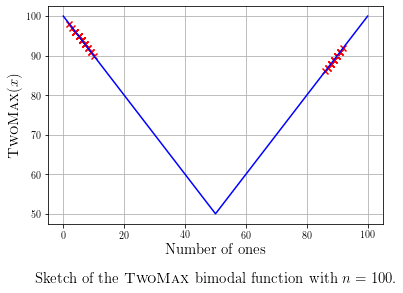

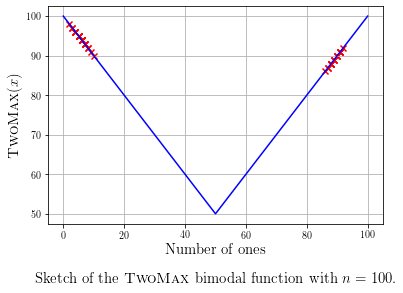

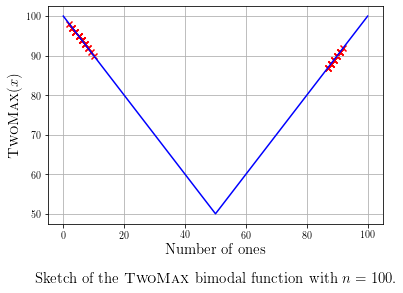

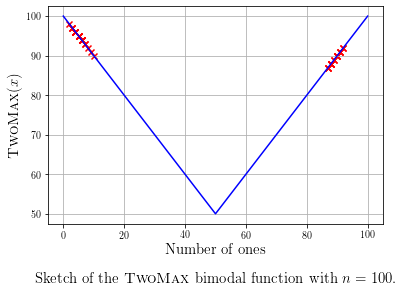

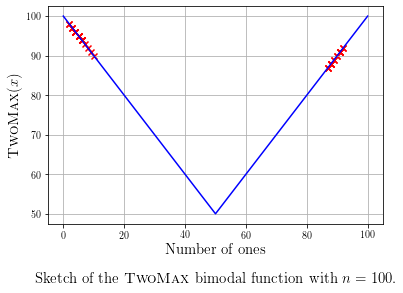

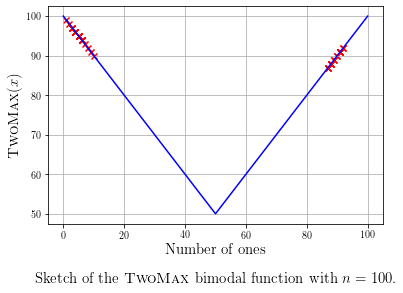

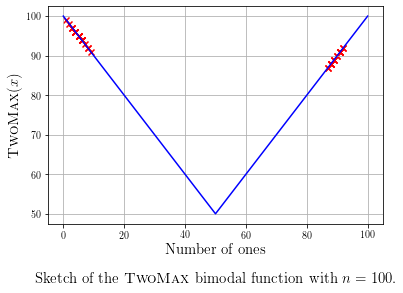

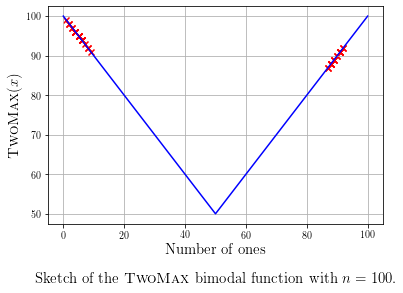

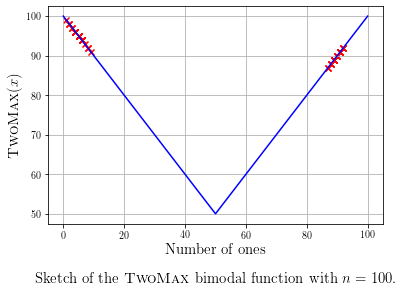

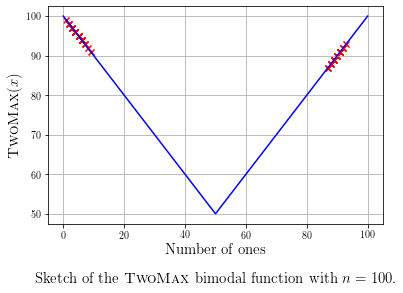

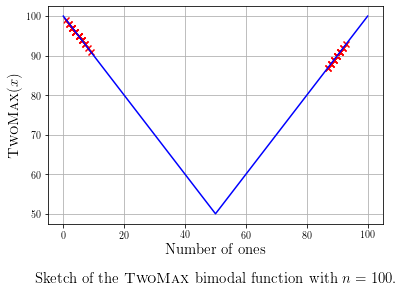

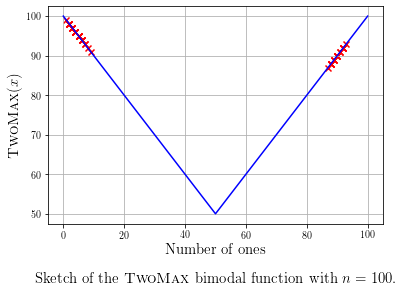

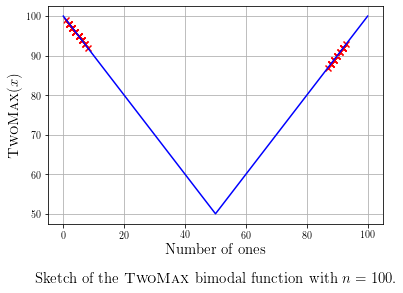

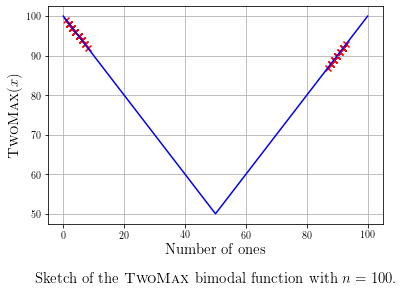

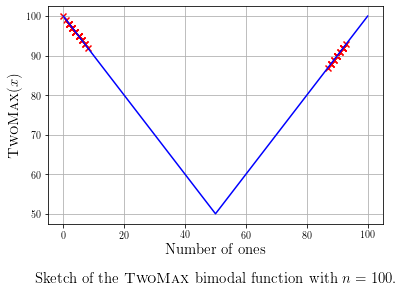

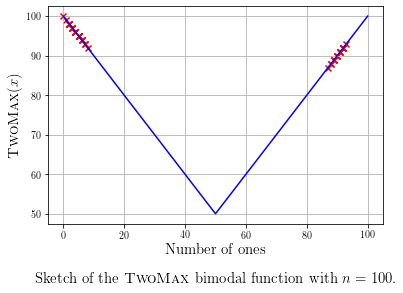

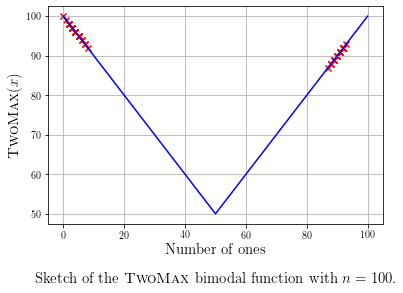

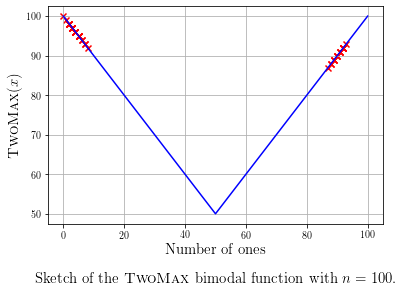

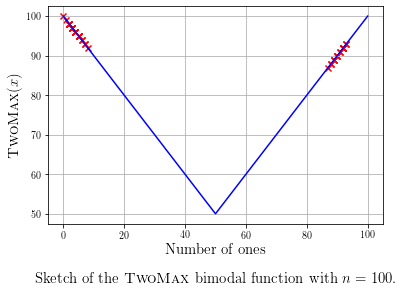

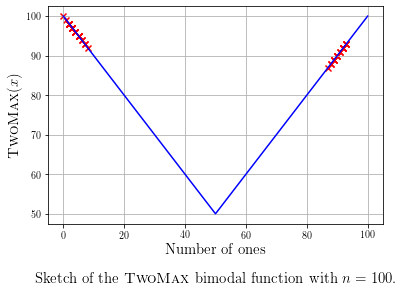

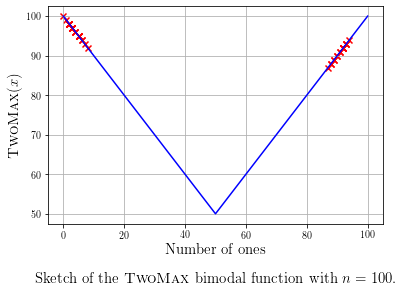

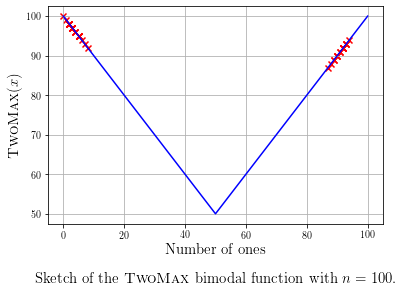

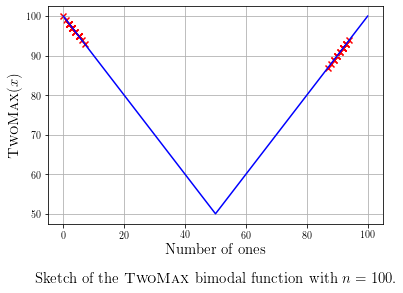

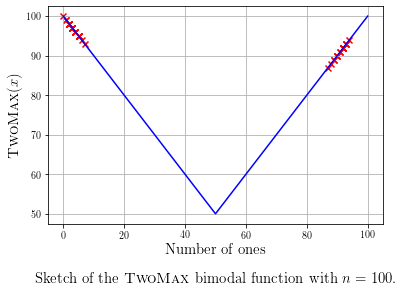

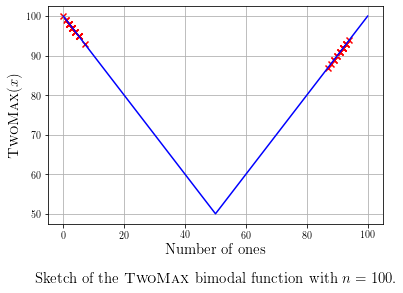

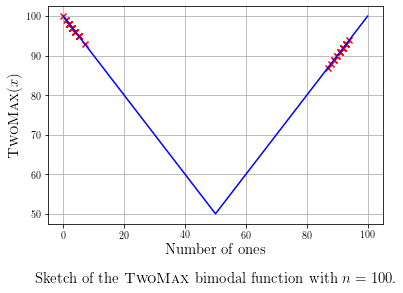

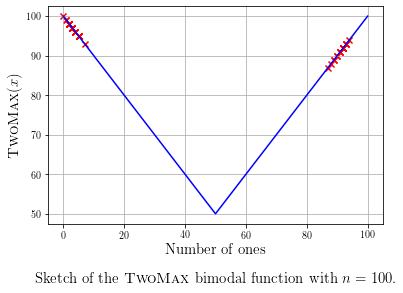

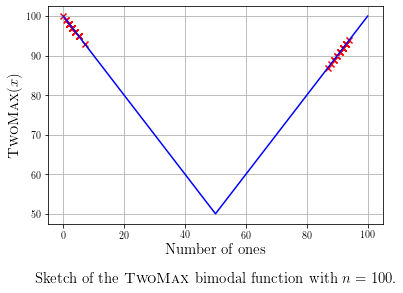

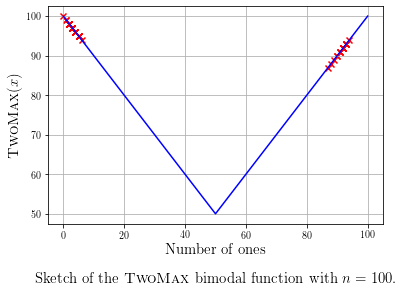

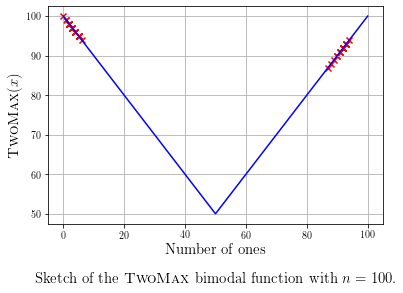

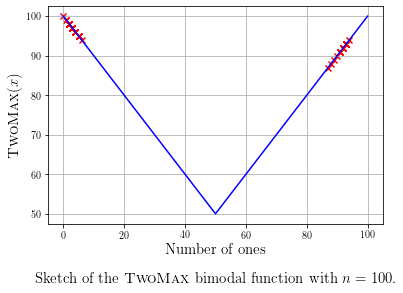

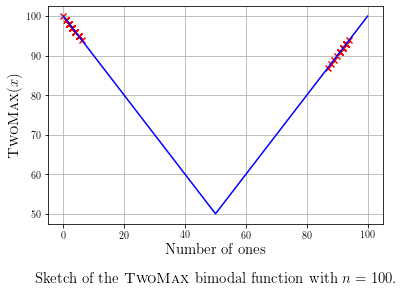

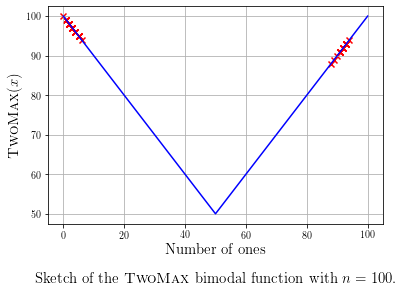

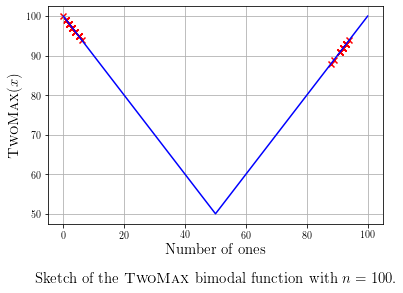

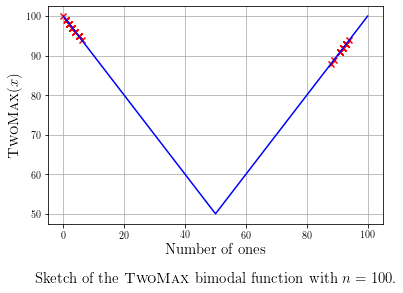

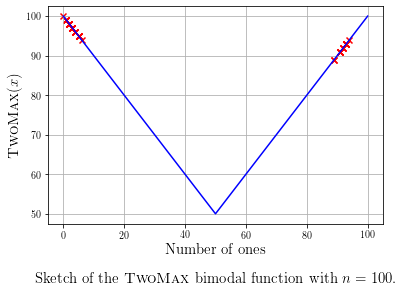

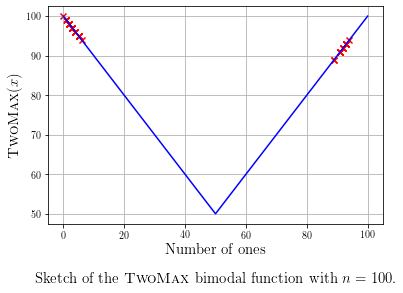

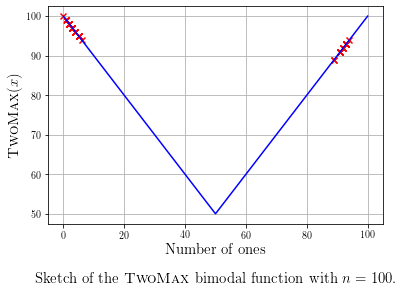

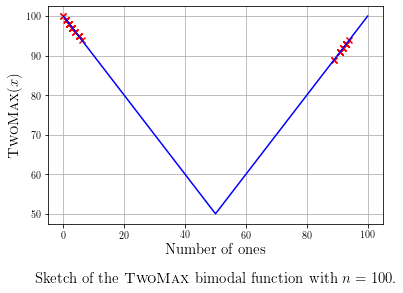

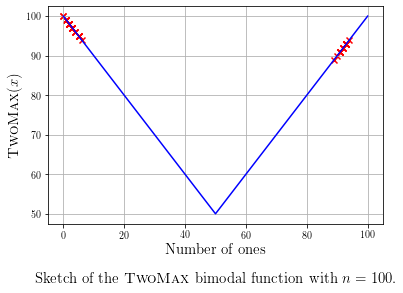

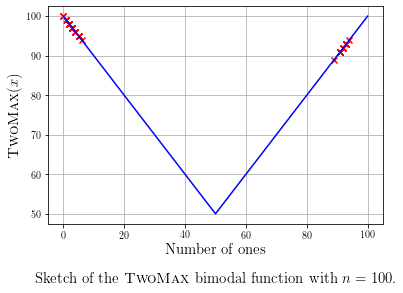

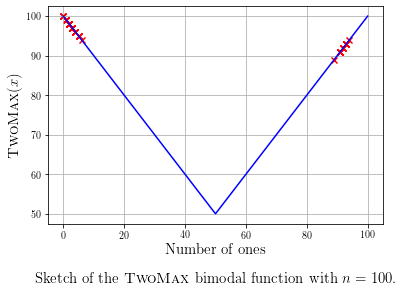

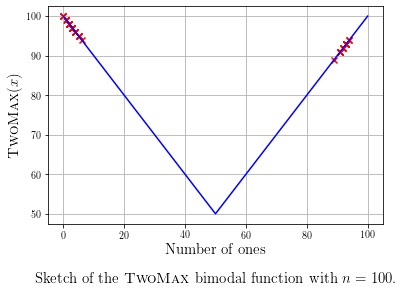

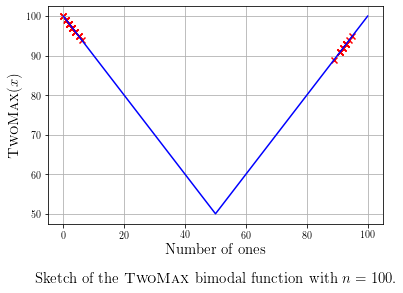

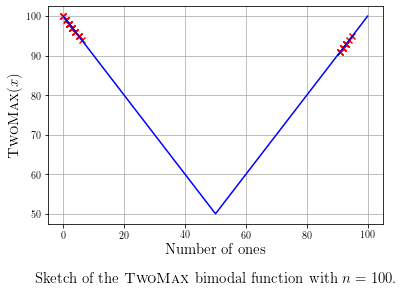

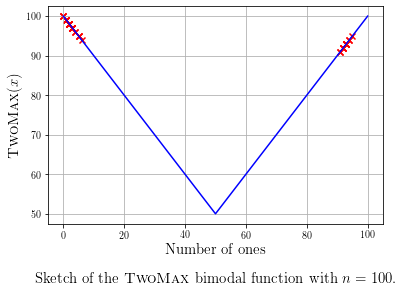

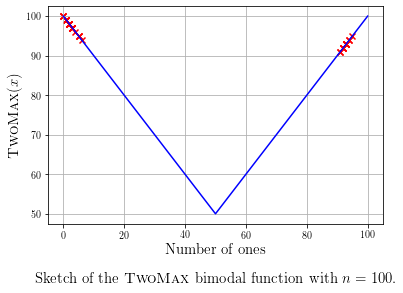

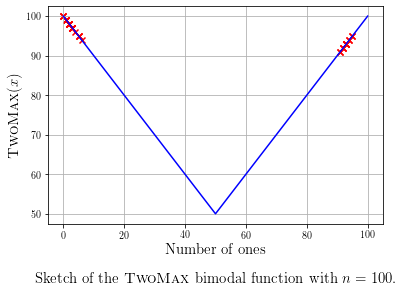

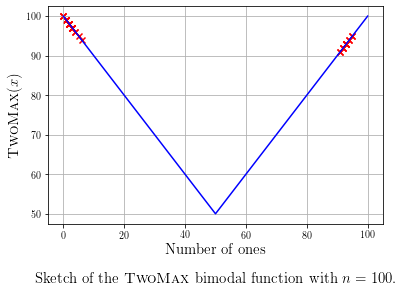

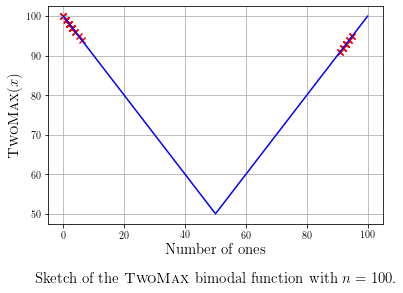

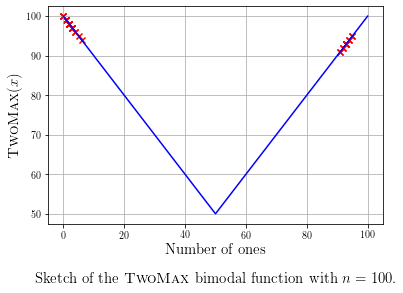

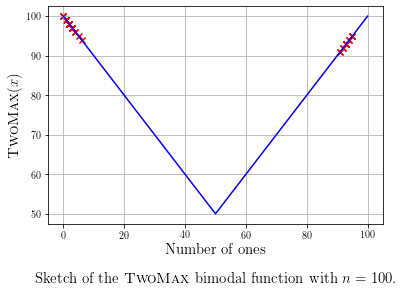

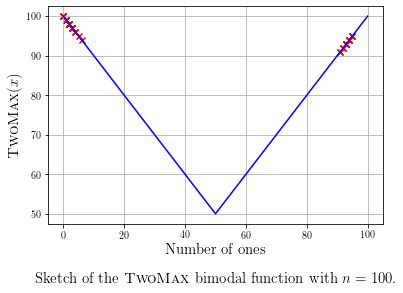

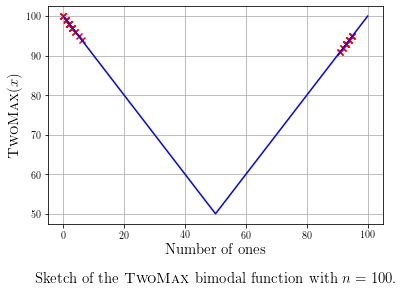

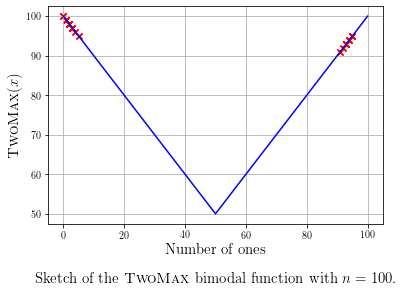

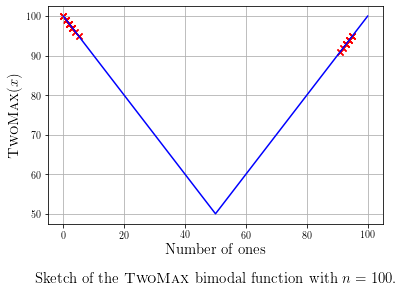

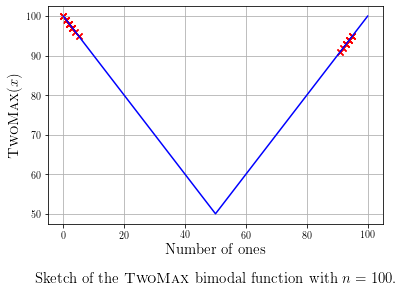

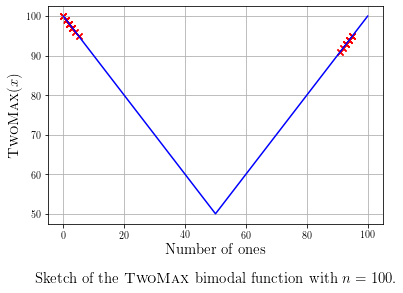

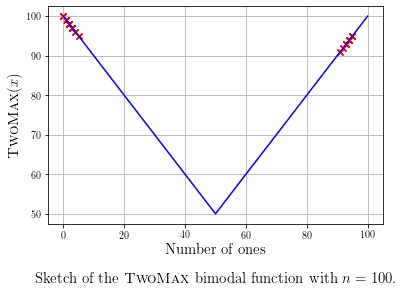

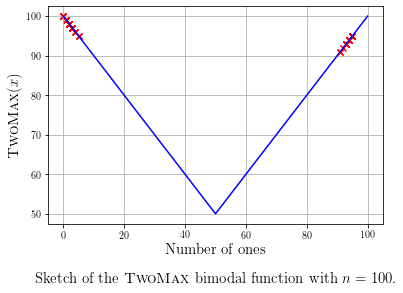

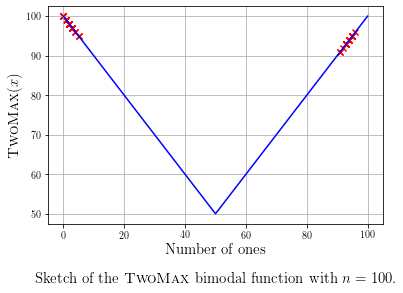

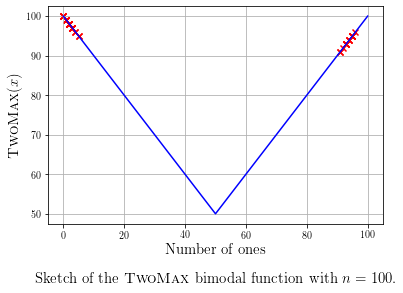

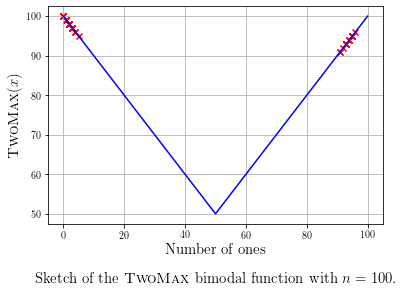

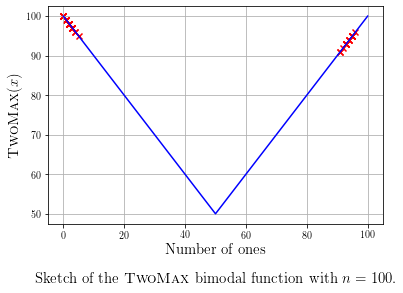

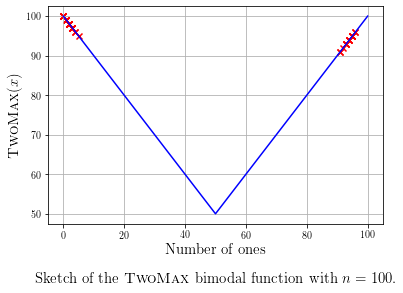

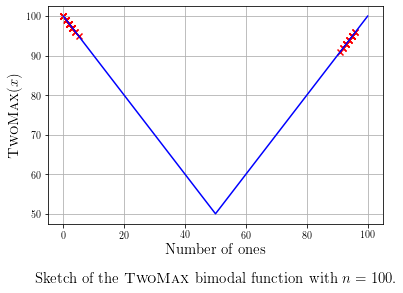

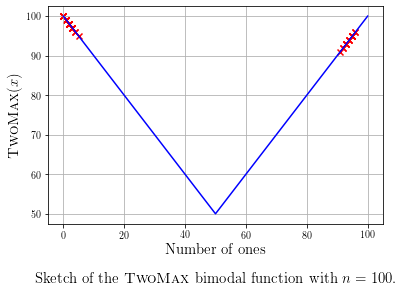

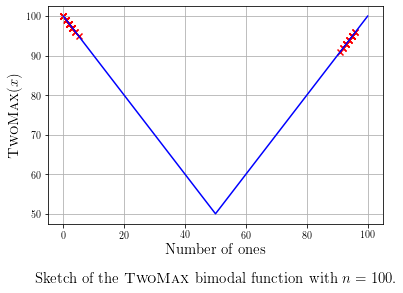

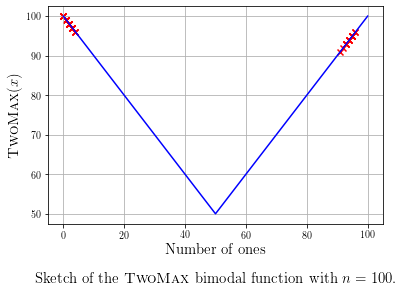

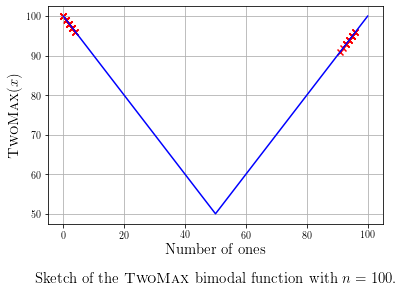

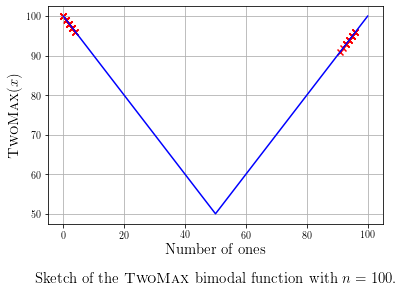

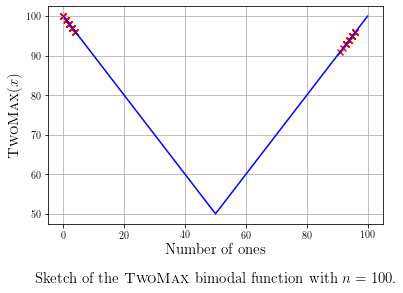

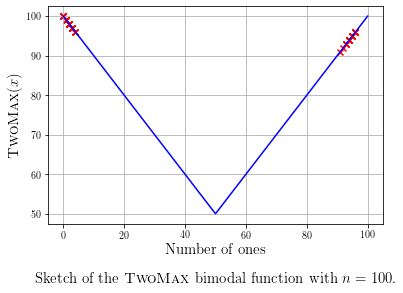

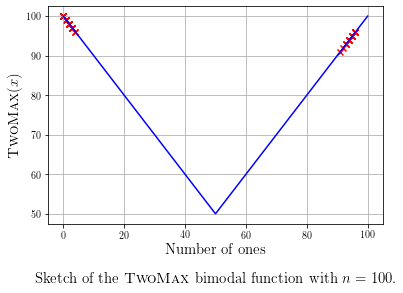

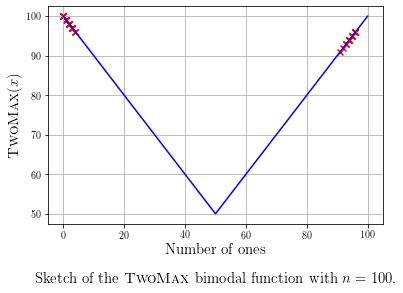

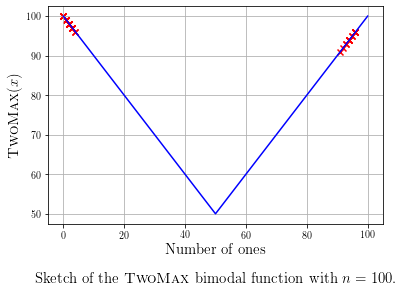

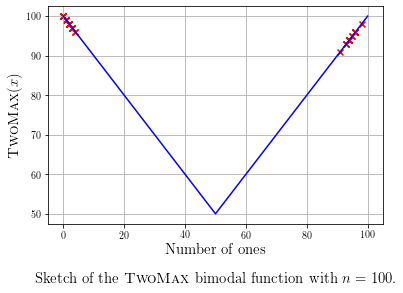

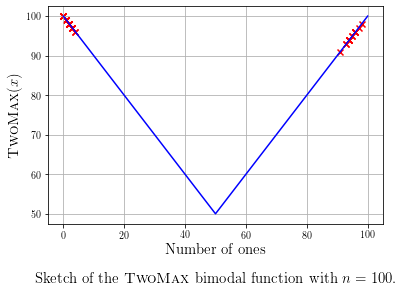

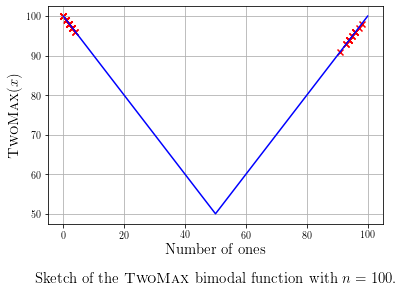

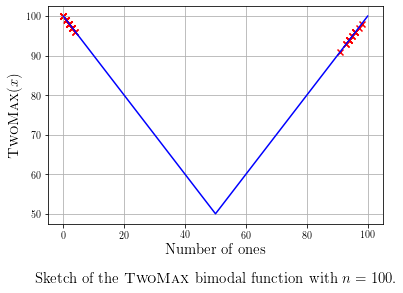

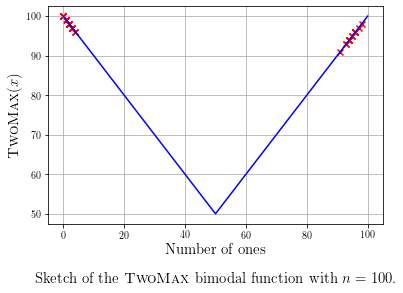

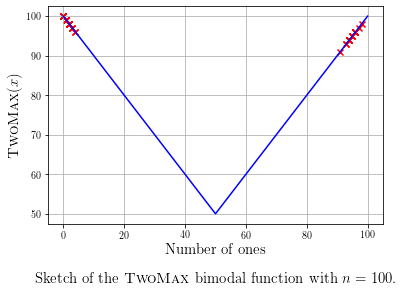

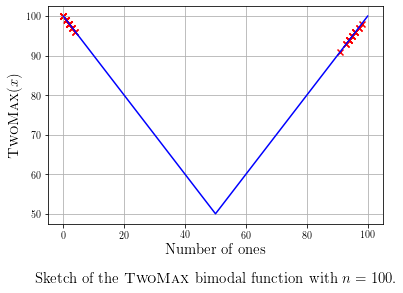

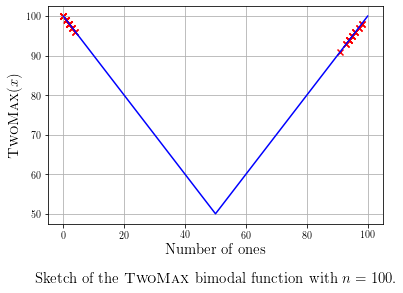

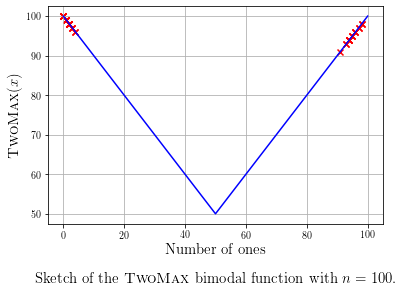

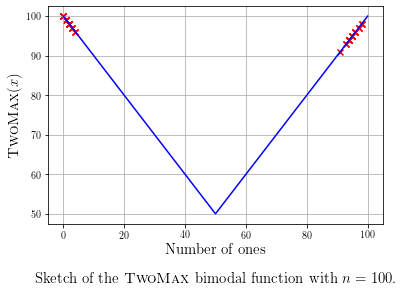

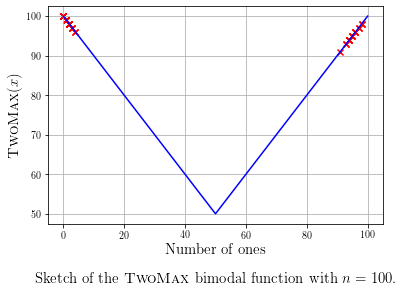

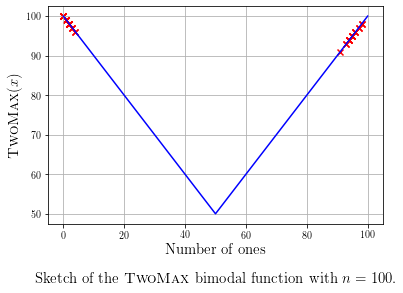

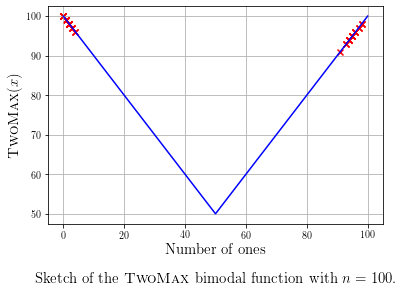

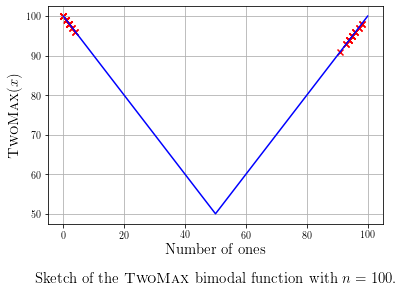

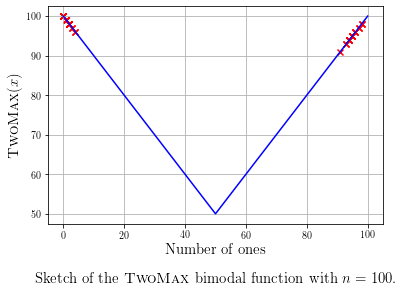

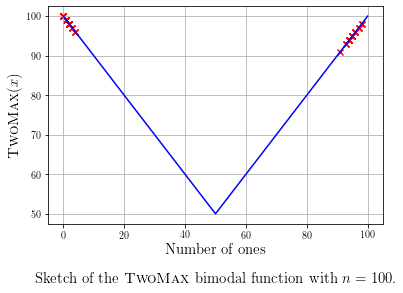

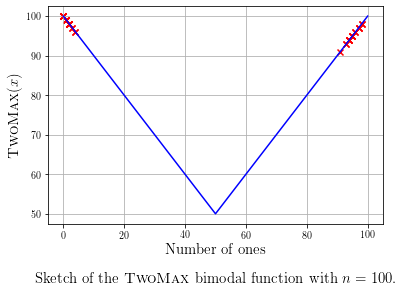

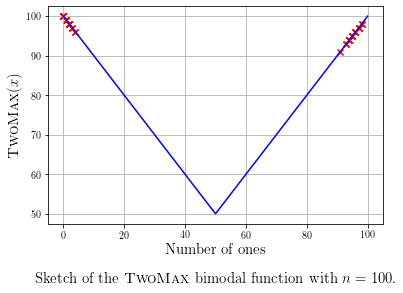

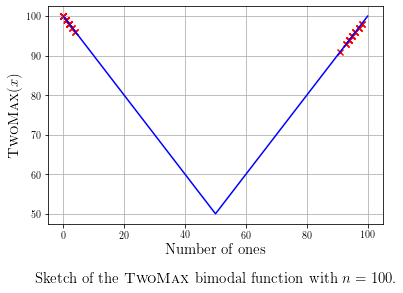

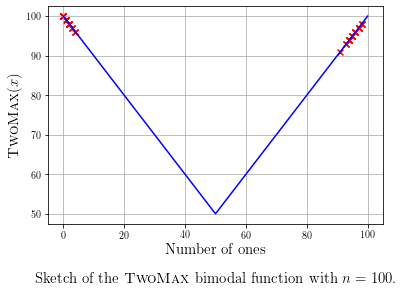

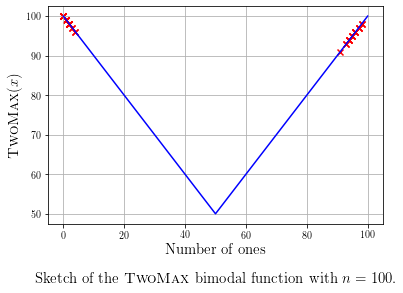

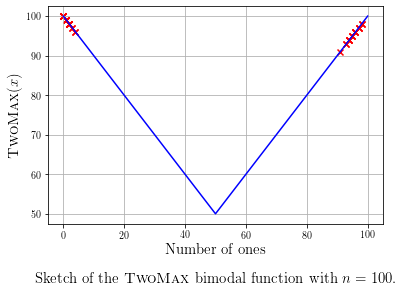

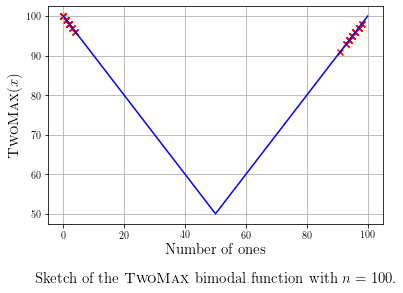

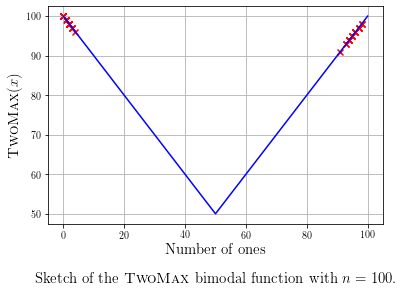

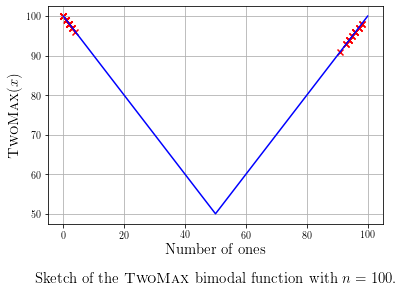

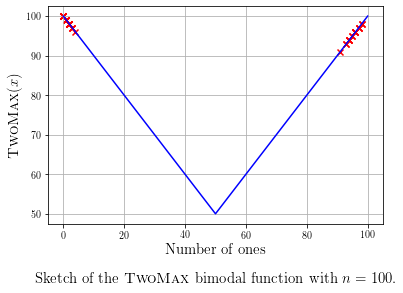

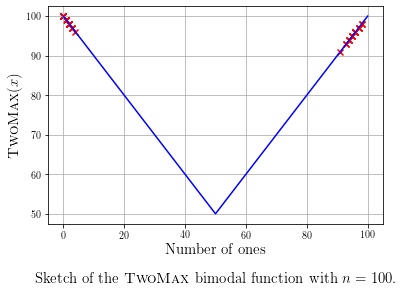

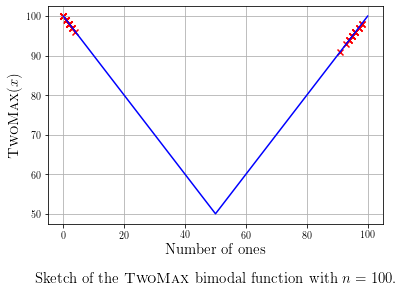

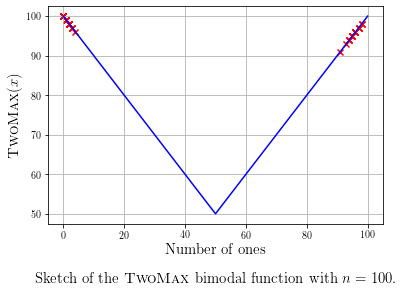

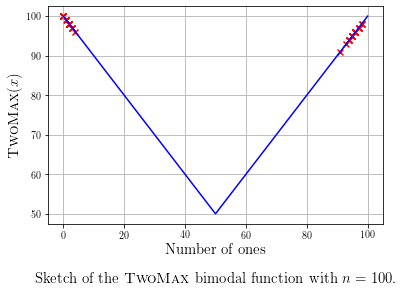

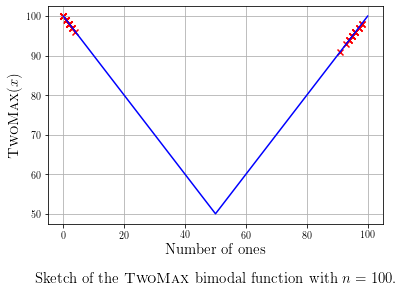

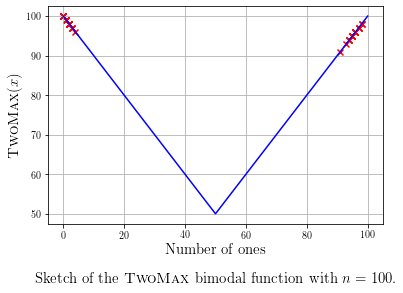

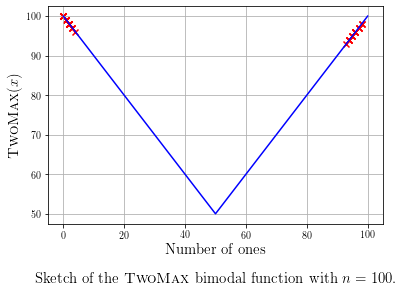

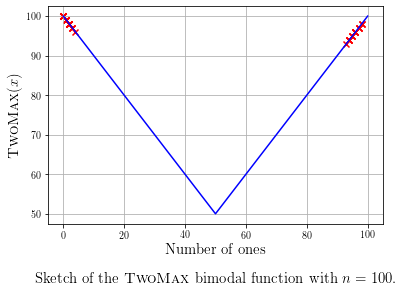

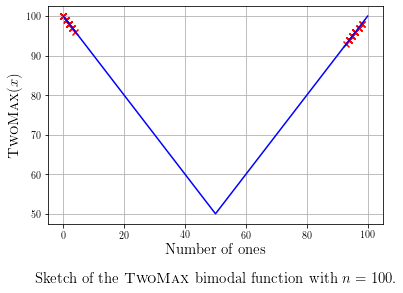

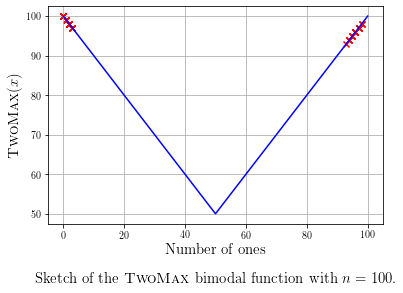

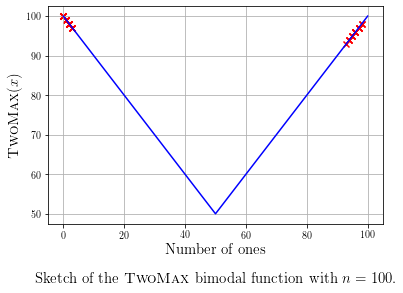

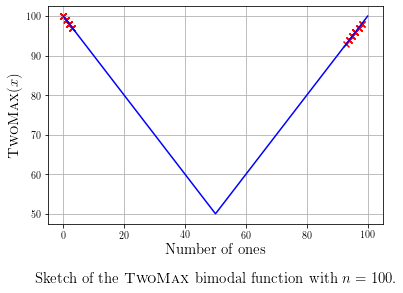

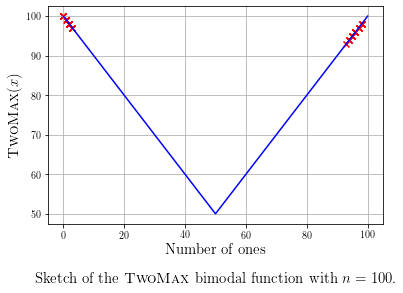

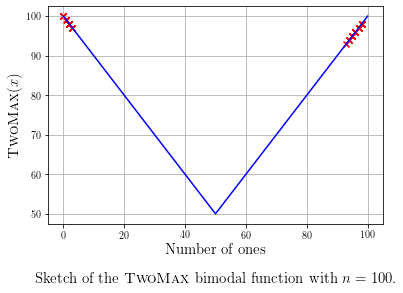

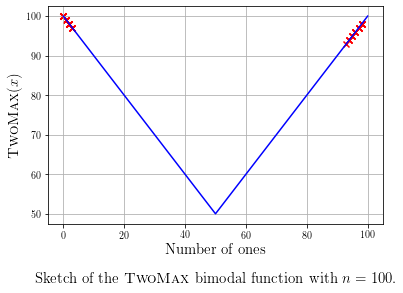

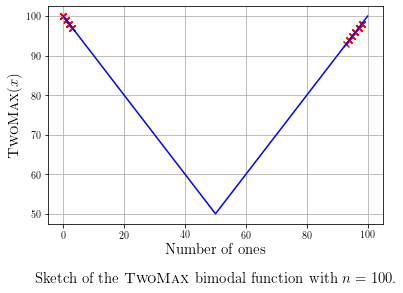

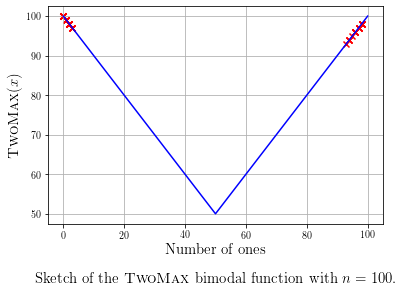

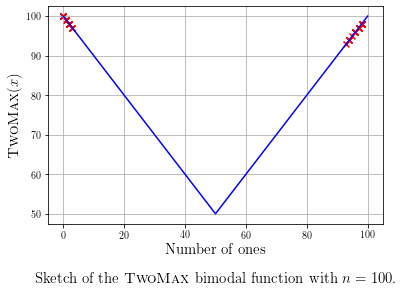

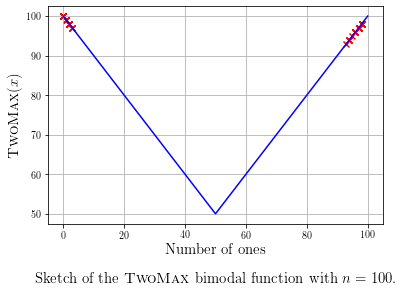

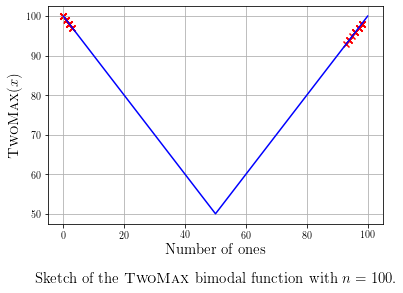

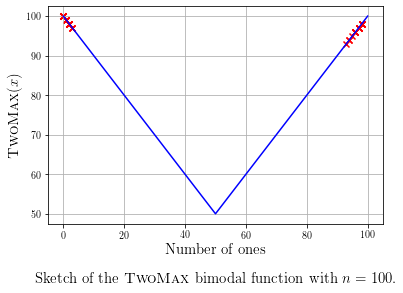

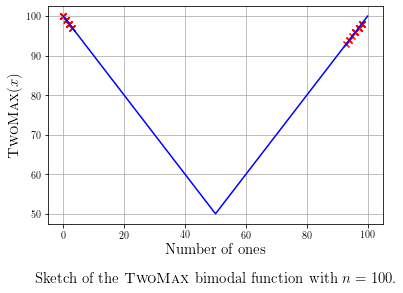

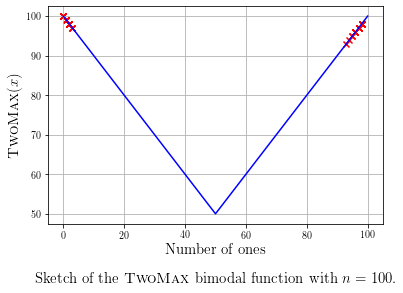

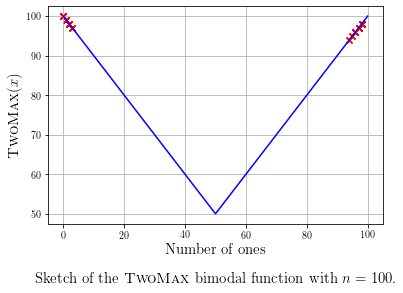

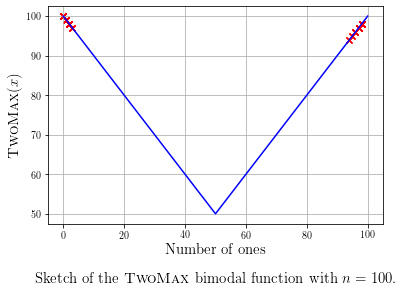

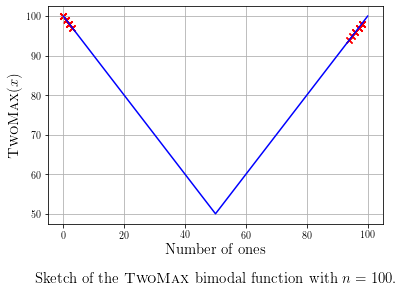

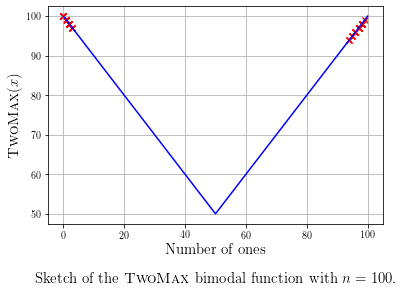

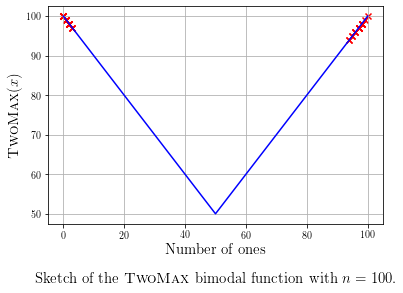

271 Generations needed of 230259
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


In [33]:
gc = 0 # counter of generations
old_pop = new(problem_size,population_size)
new_pop = [None] * population_size

for i in range(number_generations):
  new_pop = crowdingStep(old_pop, S, mutation_prob, crossover_prob, gc, R, twomax)
  old_pop = new_pop
  gc += 1

  X = []
  for elem in old_pop:
    X.append(sum(elem))

  y = np.array(list(map(twomax, old_pop)))

  dimension = problem_size
  x = np.arange(0, dimension+1, 1)

  plt.figure()
  plt.title(r'Sketch of the $\textsc{TwoMax}$ bimodal function with $n=100$.',size=15, y=-0.3)
  plt.xlabel(r'Number of ones', size=15)
  plt.ylabel(r'$\textsc{TwoMax}(x)$', size=15)
  #plt.xticks(np.arange(0, dimension+1, 10), size=15)
  #plt.yticks(np.arange(0, dimension+1, 10), size=15) 
  plt.plot(x, twomax_plot(x, dimension), 'b')
  plt.scatter(np.array(X), y, marker ='x',c = 'red')
  plt.grid()
  plt.show()
  
  if stop_crit(new_pop,problem_size,twomax):
    print(gc, "Generations needed of", number_generations)
    break

print(old_pop)

## $\Mtwo$ equally spaced decreasing optima

Here is the formal definition of the $\Mtwo$ function.

**Definition ($\Mtwo$)**: Consists of equally spaced peaks of non-uniform height with a global optima located at $x$ value of $0.1$ with height $1.000$, and 4 local optima located at $x$ values of $0.3$, $0.5$, $0.7$, $0.9$ with height $0.917$, $0.707$, $0.459$, and $0.250$, respectively. The function is defined as 
$$\Mtwo(x):=e^{-2\left(\ln 2\right)\left(\frac{x-0.1}{0.8}\right)^2}\sin^6(5\pi x)$$

The single variable $x$ is restricted to the real-value range $[0, 1]$.

### Function Definition
Here is the definition of the $\Mtwo$ function.

In [ ]:
# Definition of the M_2 function
def m_2(x):
  return np.exp(-2 * np.log(2) * np.power((x-0.1)/0.8,2)) * np.power(np.sin(5 * np.pi * x), 6)

A sketch of the $\Mtwo$ can be obtained by running the following cell.

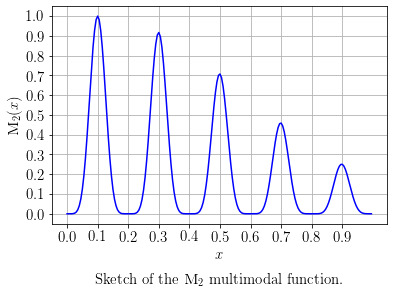

In [ ]:
x = np.arange(0.0, 1.0, 0.005)
plt.figure()
plt.title(r'Sketch of the $\textsc{M}_2$ multimodal function.',size=15, y=-0.3)
plt.xlabel(r'$x$', size=15)
plt.ylabel(r'$\textsc{M}_2(x)$', size=15)
plt.xticks(np.arange(0, 1, 0.1), size=15)
plt.yticks(np.arange(0, 1.1, 0.1), size=15) 
plt.plot(x, m_2(x), 'b')
plt.grid()
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use this parameter to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find all optima in $\Mtwo$. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all optima before all the time budget is used go ahead stop the run.

In [ ]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 50
offspring_size = 0 # not used
mutation_prob = 0.1
crossover_prob = 0 # not used
problem_size =  0  # this will be your problem size or the size of your individuals (not used)
sigma = 0.1
kappa = 5


# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for $\Mtwo$
**This problem was solved using Clearing proposed by Petrowski in 1996 [3] but with a small tweak. The algorithm used in the notebook can be boiled down in the following steps:**
1.  The population of size n is initializated.
2.  A new population is created by mutatiting the initialized population. The small tweak is that this code does not use crossover, because in some cases it creates lethal individuals from very good solutions [4].
3. Each individual of the population is evaluated with the fitness function.
4. The population, now with size 2n, is sorted based the fitness value in descending order. 
5. Then, the clearing method comes it to picture. Each individual is selected to be compared with their neighbors in the specified radius (sigma parameter) and if that individual has higher fitness value than their neigbors then the neigbors fitness values are changed to zero. But there is another parameter called "kappa" which limits the amount of neighbors to be compared agaist the individual. The best approach is to have a medium sigma and a big kappa, to ensure that all individuals in the neighborhood are compared. But this relies on the problem itself. A bad approach would be to have a very small sigma and a big kappa, or very big sigma and a small kappa, in both cases the algorithm would not be working properly.
6. Finally, once the clearing was applied then a stochastic universal sampling was used. This part of the code ensures that there is no bias towards a specific solutions and it is also recommended by Petrowski [3]. Only n individuals are selected. Therefore, the size of the population is n again.

Note: this problems was represented with real numbers as genes.



#### Initialisation
**The following code creates individuals with real numbers from 0 to 1. The function returns a list with values from 0 to 1.**

In [ ]:
import random

# Creates the initial population
def newpopM2(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): # to add the potential solutions******
      population[i] = random.uniform(0, 1)  
      
  return population

#### Stopping Criterion
**The stop criterion for this problem is specified as the number of runs which in this case was previously defined by the professor as 50.**

#### Selection for Reproduction
**The following code implements the stochastic universal sampling. Which pseudo code was taken from [5]. It is important to mention that this code is used at the final of the code, to select the individuals that have higher probability based on their fitness value. There is no selection for reproduction per se, but there is a selection of individuals to be part of the new generation which will be used for reproduction.**

In [ ]:
def stochastic_universal(population,evaluation):
  #*** SUS
  F = sum(evaluation) #offset of zero
  N =  len(evaluation)//2
  P = F/N
  Start = random.uniform(0, P)
  Pointers = [Start + i * P for i in range(N)]

  #*** RWS
  Keep = []
  for P in Pointers:
      i = 0
      while sum(evaluation[:i+1]) < P : 
          i += 1
      Keep.append(population[i])
  """
  print(population,"population")
  print(evaluation+22,"evaluation with offset")
  print(Pointers,"Pointers")    
  print(Keep,"Selected")
  """
  return Keep

#### Variation
**The following cell implements the mutation, which in this case is the full change of the individual based on the probability of mutation. This approach was decided becuase it promotes diversification, but the code will wipe out the individuals with low fitness value. This is used for exploration.**

In [ ]:
import random 

def mutateM2(individual, mRate):
  """
  Does not mutate all the x an y, it depends on the probability
  """
  x = individual

  if (random.random() <= mRate):
    x =  random.uniform(0, 1)
    
  return x

#### Selection for Survival

**The first functon is only to measure the distance between solutions which is necessary for the niching algorithm (is the difference of values). The next function "clearingStepM2" implements the clearing approach. As mentioned in the previous cells, it starts with the mutation of the initial population, then the children are merged with the parents, then the each individual is evaluated. Later, the individuals are sorted in descending order based on their fitness value and then they are used to be compared withing their niche, if they are the best ones then all of their neighbors fitness values are changed to zero. Finally, the individuals are selected based on the stochastic universal sampling.**

In [ ]:
import pandas as pd

def distanceReal(a,b):
  return abs(a-b)

def clearingStepM2(old_pop,sigma,kappa,mRate,fitnessFunction):

  #Mutation
  mutated_pop = list(map(lambda x: mutateM2(x,mRate),old_pop)) #Exploration

  #Union of Parents and Offsprings
  whole_pop = old_pop + mutated_pop

  #Get the fitness of all the individuals
  evaluation = np.array(list(map(fitnessFunction, whole_pop))) 
  #print("1.paso primera evaluacion", evaluation)

  #Sort the individuals from best to worst
  data = pd.DataFrame({'individual':whole_pop ,'evaluation':evaluation})
  #print("a. paso dataframe")
  sorted_data = data.sort_values(by = ['evaluation'], ascending=False)
  #print("b. paso sort values")
  sorted_eval = sorted_data['evaluation'].values
  #print("c. extraccion de sort eval")
  sorted_pop = sorted_data['individual'].values
  #print("2.paso el sort")

  #Apply clearing
  for i in range(len(whole_pop)):
    if sorted_eval[i] > 0: #instead of zero
      nbWinners = 1
      #print("entre no soy cero con iteracion i: ", i)
      for j in range (len(whole_pop)):
        #print("entre al segundo for con iteracion j: ", j)
        if (sorted_eval[j] > 0) and (distanceReal(sorted_pop[i],sorted_pop[j]) < sigma):
          #print("entre no soy cero y la distancia es menor que sigma",sorted_eval[i],sorted_eval[j])
          if nbWinners < kappa:
            #print("vive: winners menor que kappa", sorted_eval[j] )
            nbWinners += 1
          else:
            #print("muere: winners mayor que kappa",sorted_eval[j])
            sorted_eval[j] = 0 #instead of zero
  #print("3.paso el clearing") 

  #print("sorted pop", len(sorted_pop), type(sorted_pop))
  #print("sorted eval", len(sorted_eval), type(sorted_eval))
  #Apply selection method
  selected_pop = stochastic_universal(sorted_pop, sorted_eval) #Exploration
  #print("4.paso el stochastic") 

  return list(selected_pop)

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should look something like this
```
# <Generation/Fitness Evaluation number> <Fitness> <Genotype>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The code below is only a for which call the clearing step to create new population with the best solutions. The stop criterion used is only the number of runs allowed. And, it is important to highlight that the value of sigma and kappa were found by testing the algorithm severeal times.

In [ ]:
gc = 0 # counter of generations
old_pop = newpopM2(population_size)

for i in range(number_runs):
  new_pop = clearingStepM2(old_pop,sigma,kappa,mutation_prob,m_2)
  old_pop = new_pop
  gc += 1

In [ ]:
print(old_pop)

[0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.09987729339673601, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.298031188636081, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.498968745435875, 0.6976231455978633, 0.6976231455978633, 0.6976231455978633, 0.6976231455978633, 0.6976231455978633, 0.6976231455978633, 0.6976231455978633, 0.8954630092578988, 0.8954630092578988, 0.8954630092578988, 0.8954630092578988]


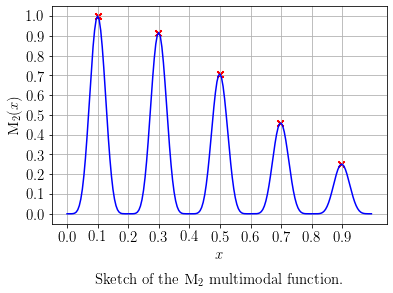

In [ ]:
x = np.arange(0.0, 1.0, 0.005)
plt.figure()
plt.title(r'Sketch of the $\textsc{M}_2$ multimodal function.',size=15, y=-0.3)
plt.xlabel(r'$x$', size=15)
plt.ylabel(r'$\textsc{M}_2(x)$', size=15)
plt.xticks(np.arange(0, 1, 0.1), size=15)
plt.yticks(np.arange(0, 1.1, 0.1), size=15) 
plt.plot(x, m_2(x), 'b')
plt.scatter(old_pop, m_2(np.array(old_pop)), marker ='x',c = 'red')
plt.grid()
plt.show()

**To finalize, the following cell prints the genes as x and also the fitness value which is y. Sometimes there might be a small error, but the algorithm works good.**

In [ ]:
for elem in old_pop:
  print("x: {0}, y:{1}".format(elem, m_2(elem)))

x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.09987729339673601, y:0.9999888220097775
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:0.9159297020674451
x: 0.298031188636081, y:

## Six-Hump Camel Back
Here is the formal definition of the Six-Hump Camel Back function.

**Definition (Six-Hump Camel Back)**: Consists of two global optima as well as 2 local optima. The function is defined as
$$f(x,y)=-4\left(\left(4-2.1x^2+\frac{x^4}{3}\right)x^2+xy+\left(4y^2-4\right)y^2\right).$$

The variables ranges are $x\in[-1.9,1.9]$ and $y\in[-1.1,1.1]$. The global optimum have heigth 4.12 and 4.12 with values for $(x,y)=(-0.0796087,0.7216242)$ and $(x,y)=(0.0796087,-0.7216242)$, respectively. The local optima have heigth 0.81101 and 0.81101 with values for $(x,y)=(-1.7310082,0.7886207)$ and $(x,y)=(1.7310082,-0.7886207)$, respectively.

In this case the values for $x$ and $y$ and the corresponding values for the global and local optima are not provided. Use your evolutionary strategy to discover them, or any means at your disposal to find them (for example make a literature review). Once you have found them complete the definition.

### Function Definition
Here is the definition of the Six-Hump Camel Back function.

In [ ]:
def six_hump_camel_back(x):
	return -4 * ((4 - 2.1 * np.power(x[0],2) + np.power(x[0],4)/3)*np.power(x[0],2)+x[0]*x[1]+(4*np.power(x[1],2)-4)*np.power(x[1],2))

A 2D-sketch of the Six-Hump Camel Back function can be obtained by running the following cell.

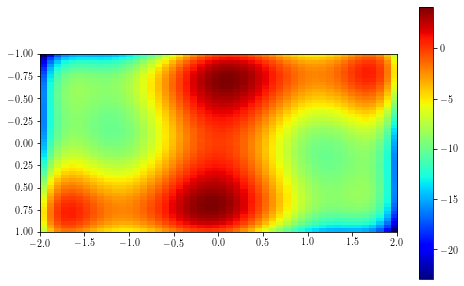

In [ ]:
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure(figsize=(8,5))
plt.imshow(six_hump_camel_back([xg, yg]), extent=[-2, 2, 1, -1], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

A 3D-sketch of the Six-Hump Camel Back function can be obtained by running the following cell.

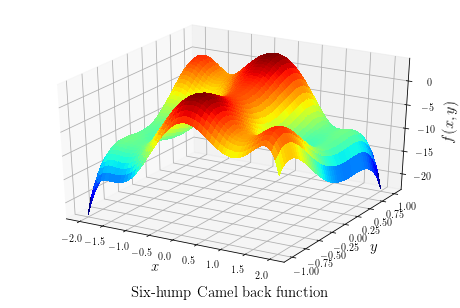

In [ ]:
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, six_hump_camel_back([xg, yg]), rstride=1, cstride=1,cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel(r'$x$', size=15)
ax.set_ylabel(r'$y$', size=15)
ax.set_zlabel(r'$f(x,y)$', size=15)
ax.set_title(r'Six-hump Camel back function', size=15, y=-0.1)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use this parameter to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find all optima in Six-Hump Camel Back. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all optima before all the time budget is used go ahead stop the run.

In [ ]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 70
offspring_size = 0 #not used
mutation_prob = 0.9
crossover_prob = 0 #not used
problem_size =  0 # this will be your problem size or the size of your individuals (not used)
sigma = 1.4
kappa = 10

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50 #
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for Six-Hump Camel Back
**This problem was solved using Clearing proposed by Petrowski in 1996 [3] but with a small tweak. The algorithm used in the notebook can be boiled down in the following steps:**
1.  The population of size n is initializated.
2.  A new population is created by mutatiting the initialized population. The small tweak is that this code does not use crossover, because in some cases it creates lethal individuals from very good solutions [4].
3. Each individual of the population is evaluated with the fitness function.
4. The population, now with size 2n, is sorted based the fitness value in descending order. 
5. Then, the clearing method comes it to picture. Each individual is selected to be compared with their neighbors in the specified radius (sigma parameter) and if that individual has higher fitness value than their neigbors then the neigbors fitness values are changed to zero. But there is another parameter called "kappa" which limits the amount of neighbors to be compared agaist the individual. The best approach is to have a medium sigma and a big kappa, to ensure that all individuals in the neighborhood are compared. But this relies on the problem itself. A bad approach would be to have a very small sigma and a big kappa, or very big sigma and a small kappa, in both cases the algorithm would not be working properly.
6. Finally, once the clearing was applied then a stochastic universal sampling was used. This part of the code ensures that there is no bias towards a specific solutions and it is also recommended by Petrowski [3]. Only n individuals are selected. Therefore, the size of the population is n again.

Note: this problems was represented with real numbers as genes.


#### Initialisation
**The following code creates individuals with real numbers. The function returns a list of list with 2 values from 0 to 1 and -1 to 1, respectively. The range of the each value depends on the problem.**

In [ ]:
import random

# Creates the initial population
def newpop(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): # to add the potential solutions******
      population[i] = [ random.uniform(-2, 2) , random.uniform(-1, 1) ]   
      
  return population

#### Stopping Criterion
**The stop criterion for this problem is specified as the number of runs which in this case was previously defined by the professor as 50.**

#### Selection for Reproduction
**The following code implements the stochastic universal sampling. Which pseudo code was taken from [5]. It is important to mention that this code is used at the final of the code, to select the individuals that have higher probability based on their fitness value. There is no selection for reproduction per se, but there is a selection of individuals to be part of the new generation which will be used for reproduction.**

Note: in this code it was necessary to use an offset (for the zero) based on the problem solution in order to make the value of the comparison be positive.

In [ ]:
def stochastic_universal(population,evaluation):
  #*** SUS
  F = sum(evaluation+22) #offset of zero
  N =  len(evaluation)//2
  P = F/N
  Start = random.uniform(0, P)
  Pointers = [Start + i * P for i in range(N)]

  #*** RWS
  Keep = []
  for P in Pointers:
      i = 0
      while sum(evaluation[:i+1]+22) < P : 
          i += 1
      Keep.append(population[i])
  """
  print(population,"population")
  print(evaluation+22,"evaluation with offset")
  print(Pointers,"Pointers")    
  print(Keep,"Selected")
  """
  return Keep

#### Variation
**The following cell implements the mutation, which in this case is the full change of both individual based on the probability of mutation. This approach was decided because it promotes diversification, but the code will wipe out the individuals with low fitness value. This is used for exploration.**

In [ ]:
import random 

def mutate2(individual, mRate):
  """
  Does not mutate all the x an y, it depends on the probability
  """
  x = individual[0]
  y = individual[1]

  if (random.random() <= mRate):
    x =  random.uniform(-2, 2)
    y = random.uniform(-1, 1)
 # if (random.random() <= mRate):
 #   y = random.uniform(-1, 1) 

  return [x,y]

#### Selection for Survival

**The first functon is only to measure the distance between solutions which is necessary for the niching algorithm (the euclidean distance). The next function "clearingStep" implements the clearing approach. As mentioned in the previous cells, it starts with the mutation of the initial population, then the children are merged with the parents, then the each individual is evaluated. Later, the individuals are sorted in descending order based on their fitness value and then they are used to be compared withing their niche, if they are the best ones then all of their neighbors fitness values are changed to zero. Finally, the individuals are selected based on the stochastic universal sampling.**

Note: in this code it was necessary to use an offset (for the zero) based on the problem solution in order to make the value of the comparison be positive.

In [ ]:
def euclidean_distance(x1,y1,x2,y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

import pandas as pd

def clearingStep(old_pop,sigma,kappa,mRate,fitnessFunction):

  #Mutation
  mutated_pop = list(map(lambda x: mutate2(x,mRate),old_pop)) #Exploration

  #Union of Parents and Offsprings
  whole_pop = old_pop + mutated_pop

  #Get the fitness of all the individuals
  evaluation = np.array(list(map(fitnessFunction, whole_pop))) 
  #print("1.paso primera evaluacion", evaluation)

  #Sort the individuals from best to worst
  data = pd.DataFrame({'individual':whole_pop ,'evaluation':evaluation})
  #print("a. paso dataframe")
  sorted_data = data.sort_values(by = ['evaluation'], ascending=False)
  #print("b. paso sort values")
  sorted_eval = sorted_data['evaluation'].values
  #print("c. extraccion de sort eval")
  sorted_pop = sorted_data['individual'].values
  #print("2.paso el sort")

  #Apply clearing
  for i in range(len(whole_pop)):
    if sorted_eval[i] > -22.92: #instead of zero
      nbWinners = 1
      #print("entre no soy cero con iteracion i: ", i)
      for j in range (len(whole_pop)):
        #print("entre al segundo for con iteracion j: ", j)
        if (sorted_eval[j] > -22.92) and (euclidean_distance(sorted_pop[i][0],sorted_pop[i][1],sorted_pop[j][0],sorted_pop[j][1]) < sigma):
          #print("entre no soy cero y la distancia es menor que sigma",sorted_eval[i],sorted_eval[j])
          if nbWinners < kappa:
            #print("vive: winners menor que kappa", sorted_eval[j] )
            nbWinners += 1
          else:
            #print("muere: winners mayor que kappa",sorted_eval[j])
            sorted_eval[j] = -22.92 #instead of zero
  #print("3.paso el clearing") 

  #print("sorted pop", len(sorted_pop), type(sorted_pop))
  #print("sorted eval", len(sorted_eval), type(sorted_eval))
  #Apply selection method
  selected_pop = stochastic_universal(sorted_pop, sorted_eval) #Exploration
  #print("4.paso el stochastic") 

  return list(selected_pop)

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should look something like this
```
# <Generation/Fitness Evaluation number> <Fitness> <Genotype>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The code below is only a for which call the clearing step to create new population with the best solutions. The stop criterion used is only the number of runs allowed. And, it is important to highlight that the value of sigma and kappa were found by testing the algorithm severeal times.

In [ ]:
gc = 0 # counter of generations
old_pop = newpop(population_size)

for i in range(number_runs):
  new_pop = clearingStep(old_pop,sigma,kappa,mutation_prob,six_hump_camel_back)
  old_pop = new_pop
  gc += 1

**The following cell is used to show where the individuals of the last population are in the solution map. It can be seen that most of the points are located in the zones where the color red is more strong which is where the global and local optima are located**.

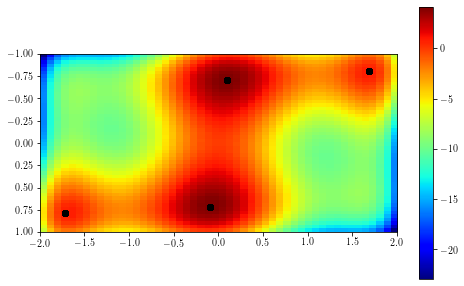

In [ ]:
x_sol = [None] * population_size
y_sol = [None] * population_size

for i in range(population_size):
  x_sol[i] = old_pop[i][0]
  y_sol[i] = old_pop[i][1]

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure(figsize=(8,5))
plt.scatter(x_sol,y_sol, marker ='o',c = 'black')
plt.imshow(six_hump_camel_back([xg, yg]), extent=[-2, 2, 1,- 1], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

**To finalize, the following cell prints the genes as x and Y and also the fitness value which is z. It is important to highlight that the highest values are not always found but the error is very small if the global maxima are at 4 and the local at 0.8 the error goes around 0.5. But the algorithm works good.**

In [ ]:
for elem in old_pop:
  print("x: {0}, y:{1}, z:{2}".format(elem[0],elem[1],six_hump_camel_back(elem)))

x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.124647782068326
x: -0.08975970871634553, y:0.7201596409439777, z:4.12464778206

## Himmelblau
Here is the formal definition of the Himmelblau function.

**Definition (Himmelblau)**: Consists of four global optima and no local optima. The function is defined as
$$f(x,y)=200-\left(x^2+y-11\right)^2-\left(x+y^2-7\right)^2.$$

The variables ranges are $x,y\in[-6,6]$. All global optimums have heigth of 199.87977932 with values for $(x,y)=\{(-2.918166,3.138464),(2.973385, 1.994523),(-3.761814,-3.287385),(3.9596997,-2.6553623)\}$.

In this case the values for $x$ and $y$ and the corresponding values for the all global optima are not provided. Use your evolutionary strategy to discover them, or any means at your disposal to find them (for example make a literature review). Once you have found them complete the definition.

### Function Definition
Here is the definition of the Himmelblau function.

In [ ]:
def himmelblau(x):
  return 200 - np.power((np.power(x[0], 2) + x[1] - 11), 2) - np.power((x[0] + np.power(x[1], 2) - 7), 2)

A 2D-sketch of the Himmelblau function can be obtained by running the following cell.

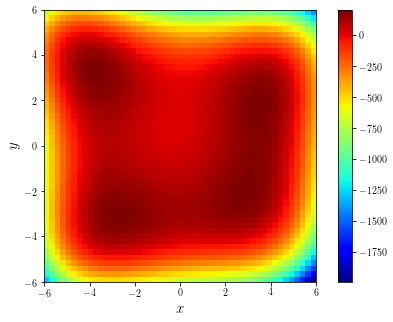

In [ ]:
x = np.linspace(-6, 6)
y = np.linspace(-6, 6)
xg, yg = np.meshgrid(x, y)

plt.figure(figsize=(8,5))
plt.imshow(himmelblau([xg, yg]), extent=[-6, 6, -6, 6], cmap=plt.cm.jet)
plt.xlabel(r'$x$', size=15)
plt.ylabel(r'$y$', size=15)
plt.colorbar()
plt.show()

A 3D-sketch of the Himmelblau function can be obtained by running the following cell.

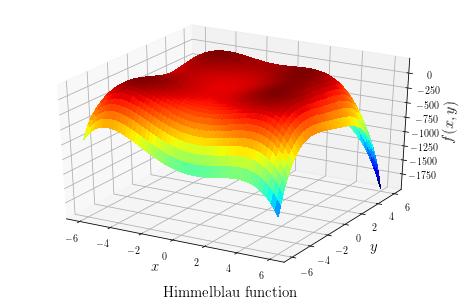

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, himmelblau([xg, yg]), rstride=1, cstride=1,cmap=plt.cm.jet, linewidth=0, antialiased=False)

point = np.array([3.0, 2.0, 200])

ax.set_xlabel(r'$x$', size=15)
ax.set_ylabel(r'$y$', size=15)
ax.set_zlabel(r'$f(x,y)$', size=15)
ax.set_title(r'Himmelblau function', size=15, y=-0.1)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter value

```
# number_runs = 50
# number_generations = 50000
```
Use this parameter to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find all optima in Himmelblau. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all optima before all the time budget is used go ahead stop the run.

In [ ]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 70
offspring_size = 0 #not used
mutation_prob = 0.9
crossover_prob = 0 #not used
problem_size =  0 # this will be your problem size or the size of your individuals (not used)
sigma = 6#
kappa = 10 #

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50 #
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for Himmelblau
**This problem was solved using Clearing proposed by Petrowski in 1996 [3] but with a small tweak. The algorithm used in the notebook can be boiled down in the following steps:**
1.  The population of size n is initializated.
2.  A new population is created by mutatiting the initialized population. The small tweak is that this code does not use crossover, because in some cases it creates lethal individuals from very good solutions [4].
3. Each individual of the population is evaluated with the fitness function.
4. The population, now with size 2n, is sorted based the fitness value in descending order. 
5. Then, the clearing method comes it to picture. Each individual is selected to be compared with their neighbors in the specified radius (sigma parameter) and if that individual has higher fitness value than their neigbors then the neigbors fitness values are changed to zero. But there is another parameter called "kappa" which limits the amount of neighbors to be compared agaist the individual. The best approach is to have a medium sigma and a big kappa, to ensure that all individuals in the neighborhood are compared. But this relies on the problem itself. A bad approach would be to have a very small sigma and a big kappa, or very big sigma and a small kappa, in both cases the algorithm would not be working properly.
6. Finally, once the clearing was applied then a stochastic universal sampling was used. This part of the code ensures that there is no bias towards a specific solutions and it is also recommended by Petrowski [3]. Only n individuals are selected. Therefore, the size of the population is n again.

Note: this problems was represented with real numbers as genes.


#### Initialisation
**The following code creates individuals with real numbers. The function returns a list of list with 2 values from -6 to 6. The range of the each value depends on the problem.**


In [ ]:
import random

# Creates the initial population
def newpopH(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): # to add the potential solutions******
      population[i] = [ random.uniform(-6, 6) , random.uniform(-6, 6) ]   
      
  return population

#### Stopping Criterion
**The stop criterion for this problem is specified as the number of runs which in this case was previously defined by the professor as 50.**

#### Selection for Reproduction

**The following code implements the stochastic universal sampling. Which pseudo code was taken from [5]. It is important to mention that this code is used at the final of the code, to select the individuals that have higher probability based on their fitness value. There is no selection for reproduction per se, but there is a selection of individuals to be part of the new generation which will be used for reproduction.**

Note: in this code it was necessary to use an offset (for the zero) based on the problem solution in order to make the value of the comparison be positive.

In [ ]:
def stochastic_universalH(population,evaluation):
  #*** SUS
  F = sum(evaluation+1700) #offset of zero
  N =  len(evaluation)//2
  P = F/N
  Start = random.uniform(0, P)
  Pointers = [Start + i * P for i in range(N)]

  #*** RWS
  Keep = []
  for P in Pointers:
      i = 0
      while sum(evaluation[:i+1]+1700) < P : 
          i += 1
      Keep.append(population[i])
  """
  print(population,"population")
  print(evaluation+1700,"evaluation with offset")
  print(Pointers,"Pointers")    
  print(Keep,"Selected")
  """
  return Keep

#### Variation
**The following cell implements the mutation, which in this case is the full change of both individual based on the probability of mutation. This approach was decided because it promotes diversification, but the code will wipe out the individuals with low fitness value. This is used for exploration.**

In [ ]:
import random 

def mutate3(individual, mRate):
  """
  Does not mutate all the x an y, it depends on the probability
  """
  x = individual[0]
  y = individual[1]

  if (random.random() <= mRate):
    x =  random.uniform(-6, 6)
    y =  random.uniform(-6, 6)
  return [x,y]

#### Selection for Survival

**The first functon is only to measure the distance between solutions which is necessary for the niching algorithm (is the difference of values). The next function "clearingStepH" implements the clearing approach. As mentioned in the previous cells, it starts with the mutation of the initial population, then the children are merged with the parents, then the each individual is evaluated. Later, the individuals are sorted in descending order based on their fitness value and then they are used to be compared withing their niche, if they are the best ones then all of their neighbors fitness values are changed to zero. Finally, the individuals are selected based on the stochastic universal sampling.**

Note: in this code it was necessary to use an offset (for the zero) based on the problem solution in order to make the value of the comparison be positive.

In [ ]:
def euclidean_distance(x1,y1,x2,y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

import pandas as pd

def clearingStepH(old_pop,sigma,kappa,mRate,fitnessFunction):
  #print("1. population", old_pop)

  #Mutation
  mutated_pop = list(map(lambda x: mutate3(x,mRate),old_pop)) #Exploration
  #print("2. mutated pop", mutated_pop)

  #Union of Parents and Offsprings
  whole_pop = old_pop + mutated_pop
  #print("3. whole pop", whole_pop)

  #Get the fitness of all the individuals
  evaluation = np.array(list(map(fitnessFunction, whole_pop))) 
  #print("4.paso primera evaluacion", evaluation)

  #Sort the individuals from best to worst
  data = pd.DataFrame({'individual':whole_pop ,'evaluation':evaluation})
  #print("a. paso dataframe",data )
  sorted_data = data.sort_values(by = ['evaluation'], ascending=False)
  #print("b. paso sort values",sorted_data)
  sorted_eval = sorted_data['evaluation'].values
  #print("c. extraccion de sort eval",sorted_eval)
  sorted_pop = sorted_data['individual'].values
  #print("5.paso el sort",sorted_pop)

  #Apply clearing
  for i in range(len(whole_pop)):
    if sorted_eval[i] > -1700: #instead of zero
      nbWinners = 1
      #print("entre no soy cero con iteracion i: ", i)
      for j in range (len(whole_pop)):
        #print("entre al segundo for con iteracion j: ", j)
        if (sorted_eval[j] > -1700) and (euclidean_distance(sorted_pop[i][0],sorted_pop[i][1],sorted_pop[j][0],sorted_pop[j][1]) < sigma):
          #print("entre no soy cero y la distancia es menor que sigma",sorted_eval[i],sorted_eval[j])
          if nbWinners < kappa:
            #print("vive: winners menor que kappa", sorted_eval[j] )
            nbWinners += 1
          else:
            #print("muere: winners mayor que kappa",sorted_eval[j])
            sorted_eval[j] = -1700 #instead of zero
  #print("6.paso el clearing en sorted eval",sorted_eval) 

  #Apply selection method
  selected_pop = stochastic_universalH(sorted_pop, sorted_eval) #Exploration
  #print("7.paso el stochastic",selected_pop) 

  return list(selected_pop)

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should look something like this
```
# <Generation/Fitness Evaluation number> <Fitness> <Genotype>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The code below is only a for which call the clearing step to create new population with the best solutions. The stop criterion used is only the number of runs allowed. And, it is important to highlight that the value of sigma and kappa were found by testing the algorithm severeal times.

In [ ]:
gc = 0 # counter of generations
old_pop = newpopH(population_size)

for i in range(number_runs):
  new_pop = clearingStepH(old_pop,sigma,kappa,mutation_prob,himmelblau)
  old_pop = new_pop
  gc += 1


**The following cell is used to show where the individuals of the last population are in the solution map. It can be seen that most of the points are located in the zones where the color red is more strong which is where the global are located**.

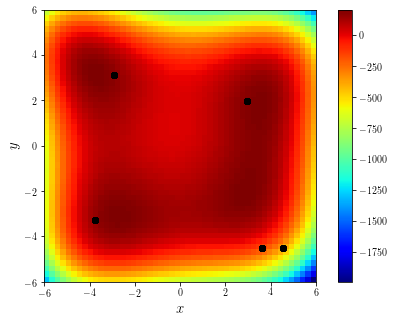

In [ ]:
x_sol = [None] * population_size
y_sol = [None] * population_size

for i in range(population_size):
  x_sol[i] = old_pop[i][0]
  y_sol[i] = old_pop[i][1]

x = np.linspace(-6, 6)
y = np.linspace(-6, 6)
xg, yg = np.meshgrid(x, y)

plt.figure(figsize=(8,5))
plt.scatter(x_sol,y_sol, marker ='o',c = 'black')
plt.imshow(himmelblau([xg, yg]), extent=[-6, 6, -6, 6], cmap=plt.cm.jet)
plt.xlabel(r'$x$', size=15)
plt.ylabel(r'$y$', size=15)
plt.colorbar()
plt.show()

**To finalize, the following cell prints the genes as x and Y and also the fitness value which is z. It is important to highlight that the highest values are not always found but the error is very small. But the algorithm works good.**

In [ ]:
for elem in old_pop:
  print("x: {0}, y:{1}, z:{2}".format(elem[0],elem[1],himmelblau(elem)))

x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.97943328407973
x: -3.761814303382789, y:-3.2873854489201153, z:199.9794332840

## Results and Discussions

The solutions for each one of the problems in this jupyer notebook were found. In some cases due to the small stochastic nature of the algorithms the accurate best solutions might not be found but solutions with small error are found instead. 

For the first problem a deterministic crowding was used to find the solutions. The algorithm works fast and it always finds the solutions. The problem was not very complicated for the algorithm. 

On the other hand the last three problems were solved with the Clearing method and stochastic universal sampling. At the beginning it was tried the deterministic crowding with binary representation but the code was starting to be messy with many tweaks to make it work. Then, after reading some papers it was found that clearing was the approach that worked best for some problems [3,4]. 

The implementation was easier and the code was simpler to follow. The only problems were to find the offset for the zero, the sigma and the kappa for each one of the problems. Outside of that the algorithm works quick and clean. There might be time that becuase of the low number of generations allowed the best solutions are not found but solution close to the best ones are found instead.

The clearing method works very good because it selects the best withn a niche, and as the solutions are getting closer, then the best of the best wipe out the other bad solutions. 

## Conclusions

This jupyter notebook presents 4 common multimodal problems from literature and their solutions with Deterministic Crowding and Clearing aproaches.

1. The solution of the problems can be done either with real or binary representation. Based on the nature of the solutions it is prefer to use one option over the other. In the first problem binary was used and in the last 3 problems real representation was used.
2. The multimodal functions have more than one solutions, could be global or local, in this case the niching methods work good to find all the solutions. In the case of the last three problems, which are more complex than the first one, it was found that clearing method works very good to find the local and global optima.
3. However, it is important to highlight that the algorithm most be adapted to the problem. Like setting the range of genes for the individuals, finding the best sigma and kappa. 
4. Also, it is necessary to use a selection algorithm to reduce the bias and spread of the solutions. In this case the stochastic universal sampling was used. It was found in literature that clearing method works better with this selection method [3,4].
5. It is necessary to understand how the algorithm works in order to be able to implement them in code.

## References

**If you use some method from the literature do not forget to add it here and the proper reference where needed.**

**Do not forger to remove all unnecessary material and just leave the list of references in this section.**

For example:

"*As a selection for survival, the method choosen is deterministic crowding as defined by Mahfoud [1]. This method is defined as ...*"

1. Mahfoud, S. W. (1995). Niching methods for genetic algorithms. PhD
thesis, University of Illinois at Urbana-Champaign.
2. Mengshoel, O. and Goldberg, D. (2008). The crowding approach to niching in genetic algorithms. In Evolutionary Computation, 16(3): 315-354. 
3. Petrowski, A. (1996). A clearing procedure as a niching method for genetic algorithms. In Proceedings of IEEE International Conference on Evolutionary Computation, pages 798-803.
4. Sareni, B. and Krahenbuhl, L. (1998). Fitness sharing and niching methods
revisited. IEEE Transactions on Evolutionary Computation, 2(3):97-106.
5. Wikipedia. (2020). Stochastic universal sampling. October 21st, 2020, de Wikipedia Sitio web: https://en.wikipedia.org/wiki/Stochastic_universal_sampling